# Worksheet 2 - Scientific Visualisation MVE080/MMG640
## Colours, proportions, associations and time-series

Name: _Houshi He_

This is the second worksheet in the course *Scientific Visualisation*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualisations using plotnine.
Once you have finished all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students, but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics.

The below loads the packages required for this homework.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 4, 10, 11, 12 and 13 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 3, we discussed colour palettes for categorical data. Briefly describe and motivate the three key properties we want a good categorical colour palette to have.

### Answer 1.1
_(i)Ensure colors are distinct enough to differentiate categories, so that we can distinguish groups of data from each other._

_(ii)Colors should be intuitive, consistent, and accessible, ensuring clarity for all viewers, so that they can represent different data values._

_(iii)Use brighter or more saturated colors to highlight important categories._

### Question 1.2

In Lecture 3, we used pie and bar charts to visualise proportions. Briefly discuss the benefits and drawbacks with using bar charts and pie charts for this purpose.

### Answer 1.2
_Bar Chart:_

_Bar charts are precise and can make easy comparison of proportions across categories. They are suitable for datasets with many categories._

_Bar charts can become cluttered if there are too many categories or lengthy labels. They may lack visual appeal for audiences expecting more engaging displays._

_Pie Chart:_

_Pie charts are visually appealing and intuitive for showing relative proportions. They work well with small datasets, emphasizing dominant categories effectively._

_It is challenging to compare similar sized proportions in pie charts accurately. They are unsuitable for datasets with many categories._

### Question 1.3

In Lecture 3, we used a mosaic plot to analyse the Titanic data. Now consider Fig. 11.3 in the course book, what are the main takeaways we can read from this visual?

### Answer 1.3
_The key point from the figure is that steel is the main material for most bridge types except crafts. Also, most bridges were built during the mature construction era._

### Question 1.4

In Lecture 4 we used a bubble chart (see also Fig. 12.3 in the course book). Why is this typically not a good option if we want to identify relationships (e.g. correlated variables) in the data?

### Answer 1.4
_Bubble charts use position and size to show quantitative data, but this makes it hard to compare relationships. Size is harder to understand than position, and bubble size is limited by the chart space, making differences harder to see._

### Question 1.5

Consider Fig. 13.10 in the course book. What is main benefit of a connected scatter plot, and what is important to think about when creating such a visual?

### Answer 1.5
_The main advantage of a connected scatter plot is that it helps to identify cyclical patterns between variables that might be hard to see otherwise. It's important to show the direction and time scale clearly, as failing to do so can lead to incorrect conclusions._


## Colours 

For this part reading chapter 4 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Colours can be a powerful tool for highlighting. Using the Simpson's paradox data on Canvas, make a scatter plot where you highlight category D3 (all other categories can have the same colour). Briefly motivate your choice of palette.

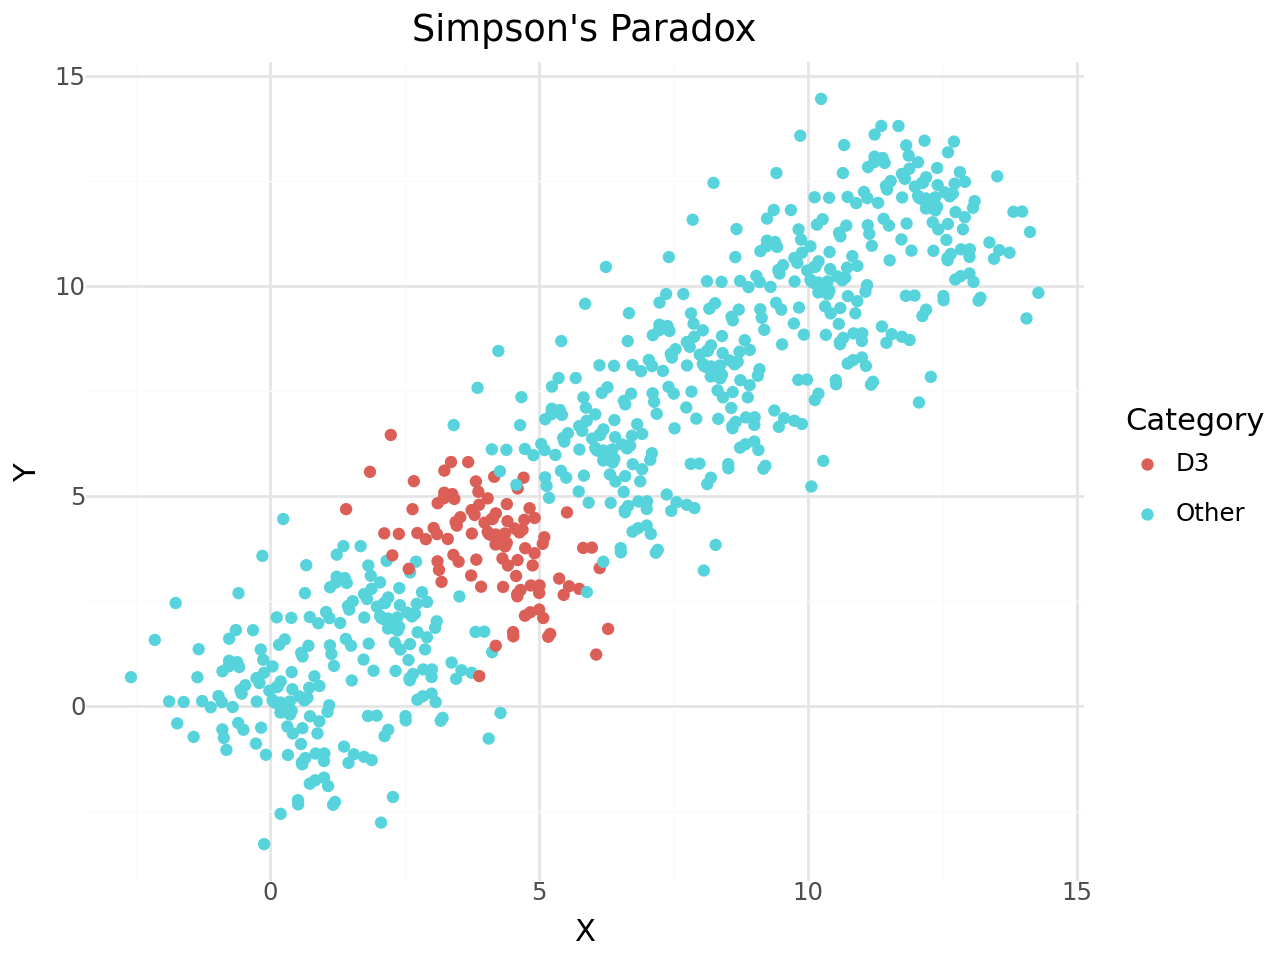

In [2]:
# Insert code here
# Load dataset and assign category
data = pd.read_csv('Simpson_paradox.csv')
data['dataset'] = pd.Categorical(data['dataset'])

# Filter data for D3 category
is_d3 = data['dataset'] == 'D3'

#'D3' for D3 category and 'Other' for all other categories
data['color_group'] = data['dataset'].apply(lambda x: 'D3' if x == 'D3' else 'Other')

# Create plot
plot = (ggplot(data, mapping=aes(x='x', y='y', colour='color_group'))
        + geom_point()  # Points are colored according to the 'color_group'
        + theme_minimal()
        + labs(x='X', y='Y', title="Simpson's Paradox", colour='Category')  # Label for the color legend
       )

plot
# Remember to print the visual 

*Brief motivation*

_I just used the default colormap. I think red and blue work well for comparison and help highlight D3._

### Question 2.2 

In Lecture 3, when comparing colourmaps, I plotted this function

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{x}{4 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

where I used colours to represent $z$. 

Now plot (as in Lecture 3 slide 3) the function

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{(0.5x)^2}{4 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

using three different [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that are sufficiently distinct. Using three monochrome maps (e.g Greys, Blues and Purples) does not count as sufficiently distinct. Code for how to use the rainbow desaturated colourmap is in the Lecture 3 notebook on Canvas.

For each colourmap briefly discuss its benefits based on what you can see from the plots you have created.

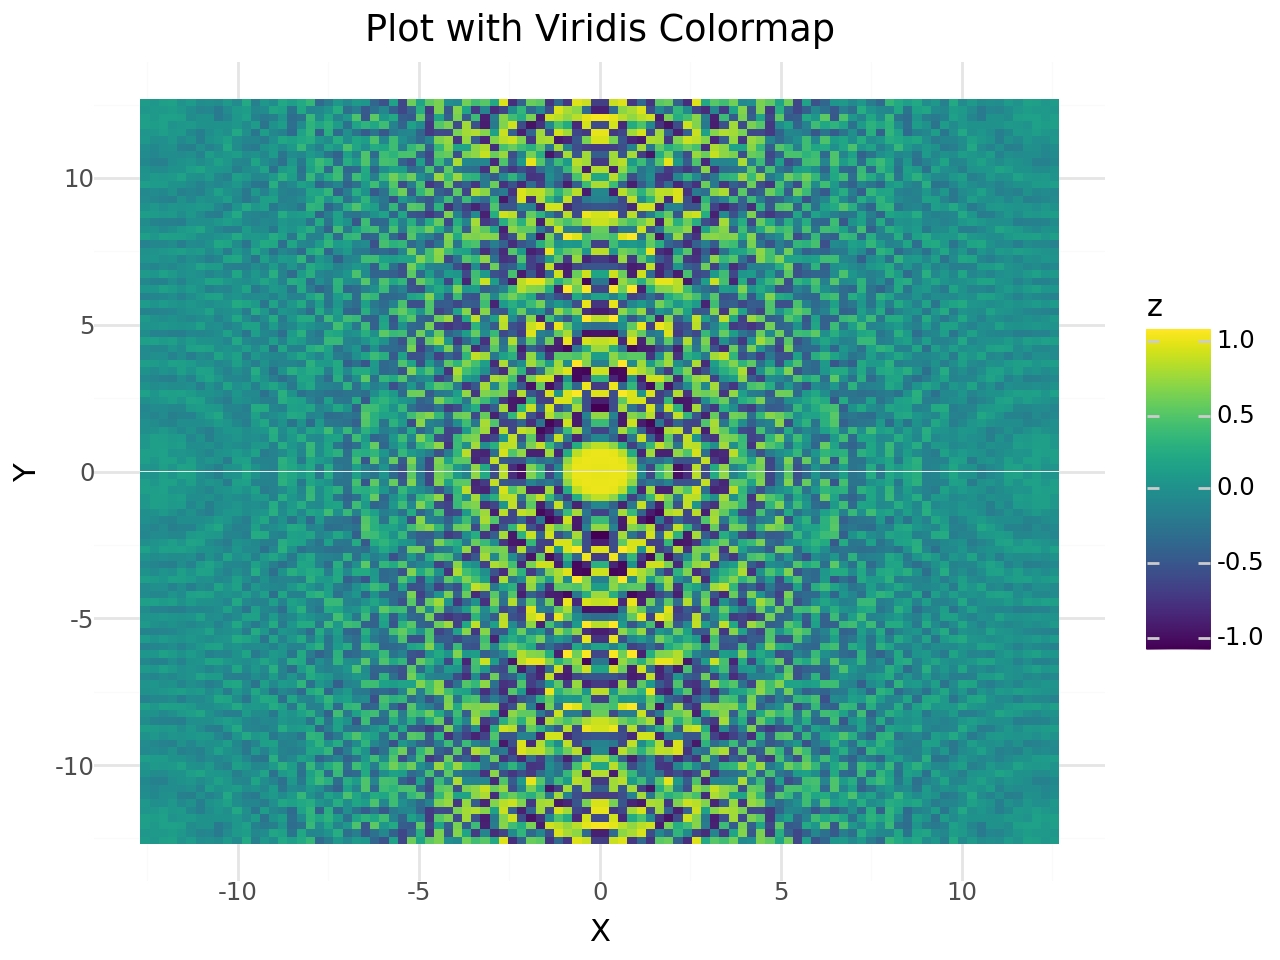

In [3]:
# Insert code here for colormap 1

# Step 1: Define the function and calculate z
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
y = np.linspace(-4 * np.pi, 4 * np.pi, 100)
X, Y = np.meshgrid(x, y)
R = X**2 + Y**2
Z = 0.1 * np.sin(R) + np.cos(R**2) * np.exp(-((0.5*X)**2) / (4 * np.pi))

# Create DataFrame for ggplot
data = pd.DataFrame({
    'x': X.ravel(),
    'y': Y.ravel(),
    'z': Z.ravel()
})

# Step 2: Create three different plots using distinct colormaps
# Plot 1: Using 'viridis' colormap
plot1 = (ggplot(data, mapping=aes(x='x', y='y', fill='z'))
         + geom_tile()
         + theme_minimal()
         + labs(x='X', y='Y', title="Plot with Viridis Colormap")
         + scale_fill_cmap('viridis')
        )

plot1
# Remember to print the visual 

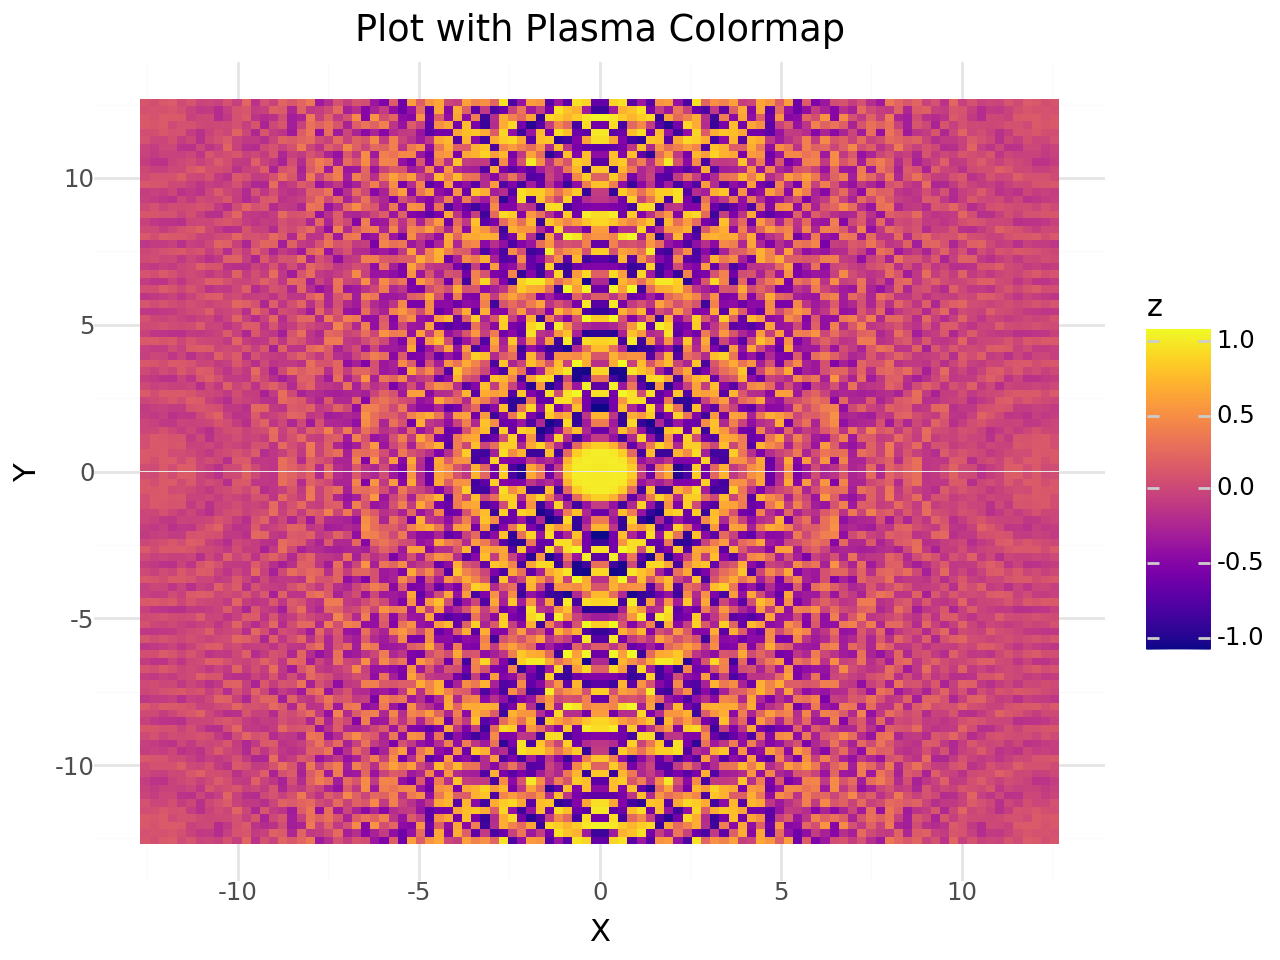

In [4]:
# Insert code here for colormap 2
# Plot 2: Using 'plasma' colormap
plot2 = (ggplot(data, mapping=aes(x='x', y='y', fill='z'))
         + geom_tile()
         + theme_minimal()
         + labs(x='X', y='Y', title="Plot with Plasma Colormap")
         + scale_fill_cmap('plasma')
        )

plot2
# Remember to print the visual 

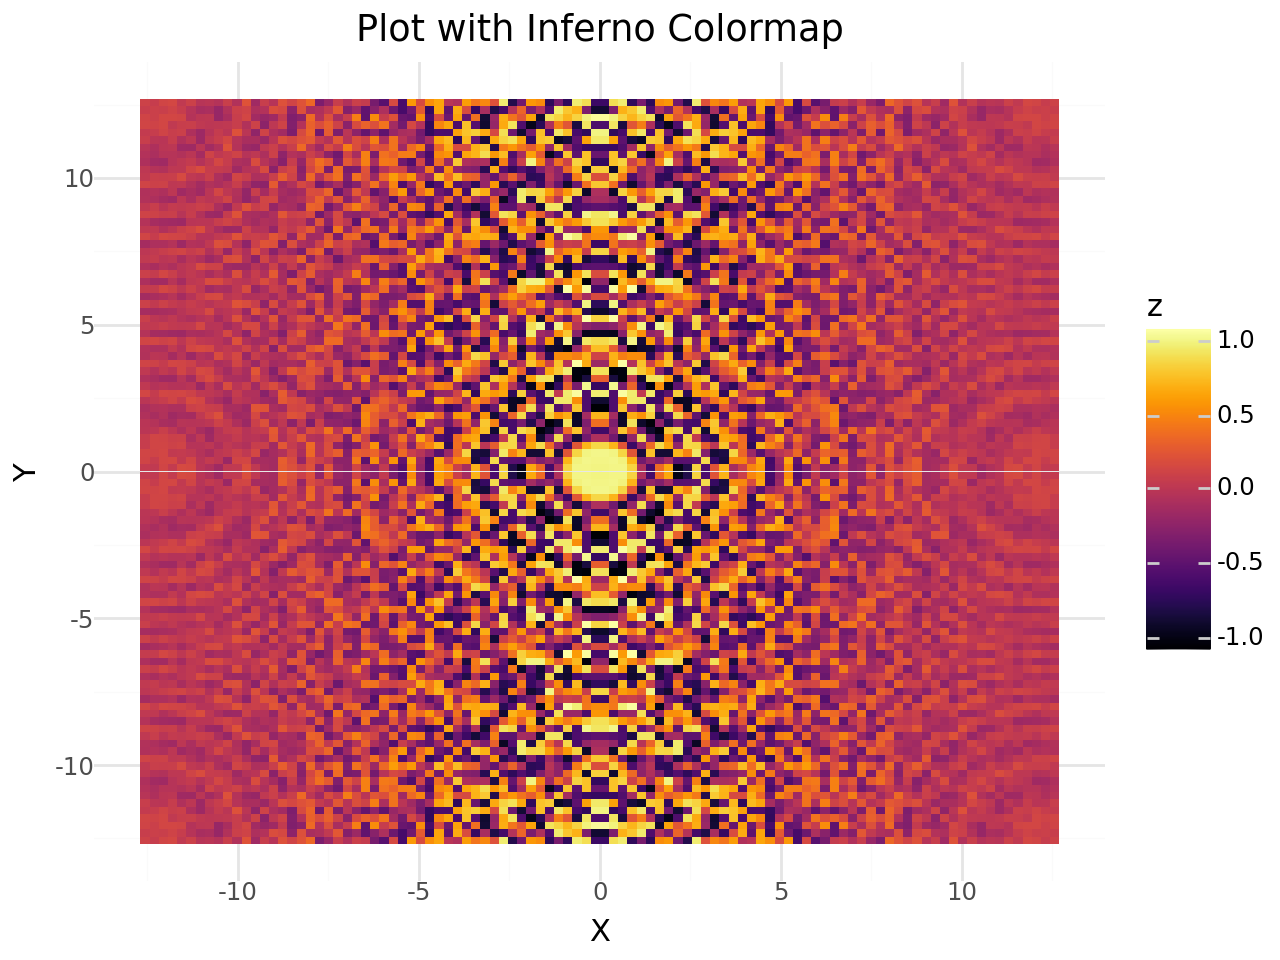

In [5]:
# Insert code here for colormap 3
plot3 = (ggplot(data, mapping=aes(x='x', y='y', fill='z'))
         + geom_tile()
         + theme_minimal()
         + labs(x='X', y='Y', title="Plot with Inferno Colormap")
         + scale_fill_cmap('inferno')
        )

plot3
# Remember to print the visual 

*Brief discussion*

_Viridis makes it easy to distinguish values. It is colorblind-friendly, suitable for everyone and accurate interpretation of the plot. It might not highlight small variations in data as well as some high-contrast colormaps._

_Plasma has high contrast, making it easier to identify details, especially in datasets with a wide range of values. The smooth color transitions make the data visualization vibrant. The high contrast might obscure details in mid-range values, particularly in lighter regions where the transitions are less obvious._

_Inferno offers high contrast with warm tones, making extreme values stand out clearly. It's well-suited for visualizing extreme data points. But it can not capture subtle changes effectively, especially in low-contrast areas._



### Question 2.3

On Canvas, I have uploaded a forest coverage dataset. To load the data you can use the code below. Produce two visuals, one where it is easy to see forest coverage for different countries in the world, and one where it is easy to see which countries in the world have a below median forest coverage. Briefly motivate choice of colourmap.

In [6]:
import geopandas as gpd
import fiona
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
data_forest = pd.read_csv("Forest_tidy-2.csv")
# Reading geometry
world_wsg84 = world.to_crs("EPSG:4326")
data_world_forest = world_wsg84.merge(data_forest, left_on="NAME", right_on="Country")

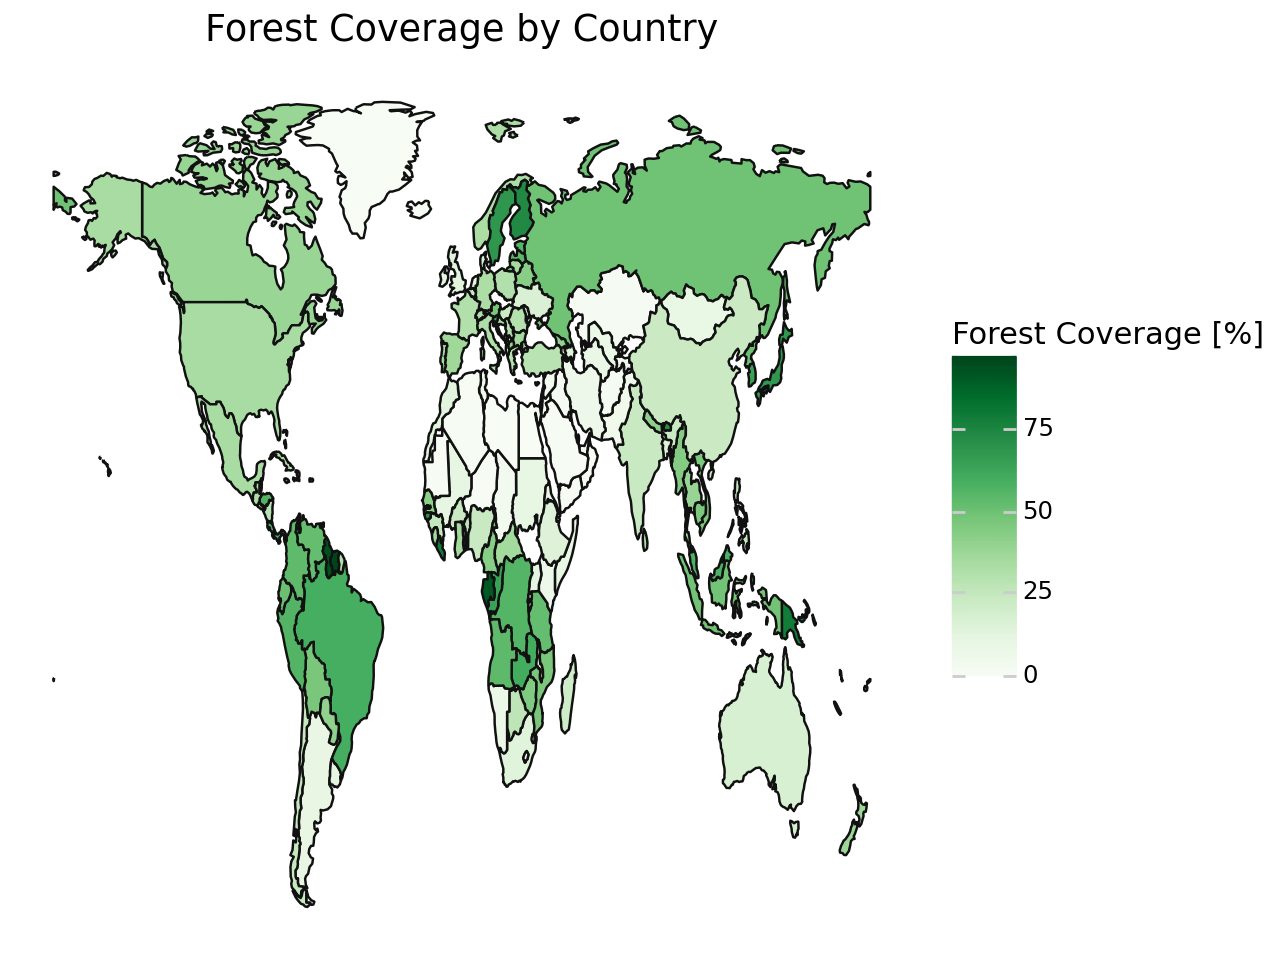

In [7]:
# Insert code here for visual 1
# Create a map, filling the countries with colors representing forest coverage
forest_map = (
    ggplot(data_world_forest, aes(fill="2019_forest"))  # Use forest coverage data to fill colors
    + geom_map()  # Plot the map using geom_map
    + labs(title="Forest Coverage by Country")  # Set the map title
    + scale_fill_cmap("Greens", name="Forest Coverage [%]")  # Set the color gradient to green
    + theme(
        panel_background=element_rect(fill="white"),  # Set the background color to white
        axis_ticks=element_blank(),  # Remove axis ticks
        axis_text=element_blank()  # Remove axis text
    )
)

# Display the map
forest_map
# Remember to print the visual 

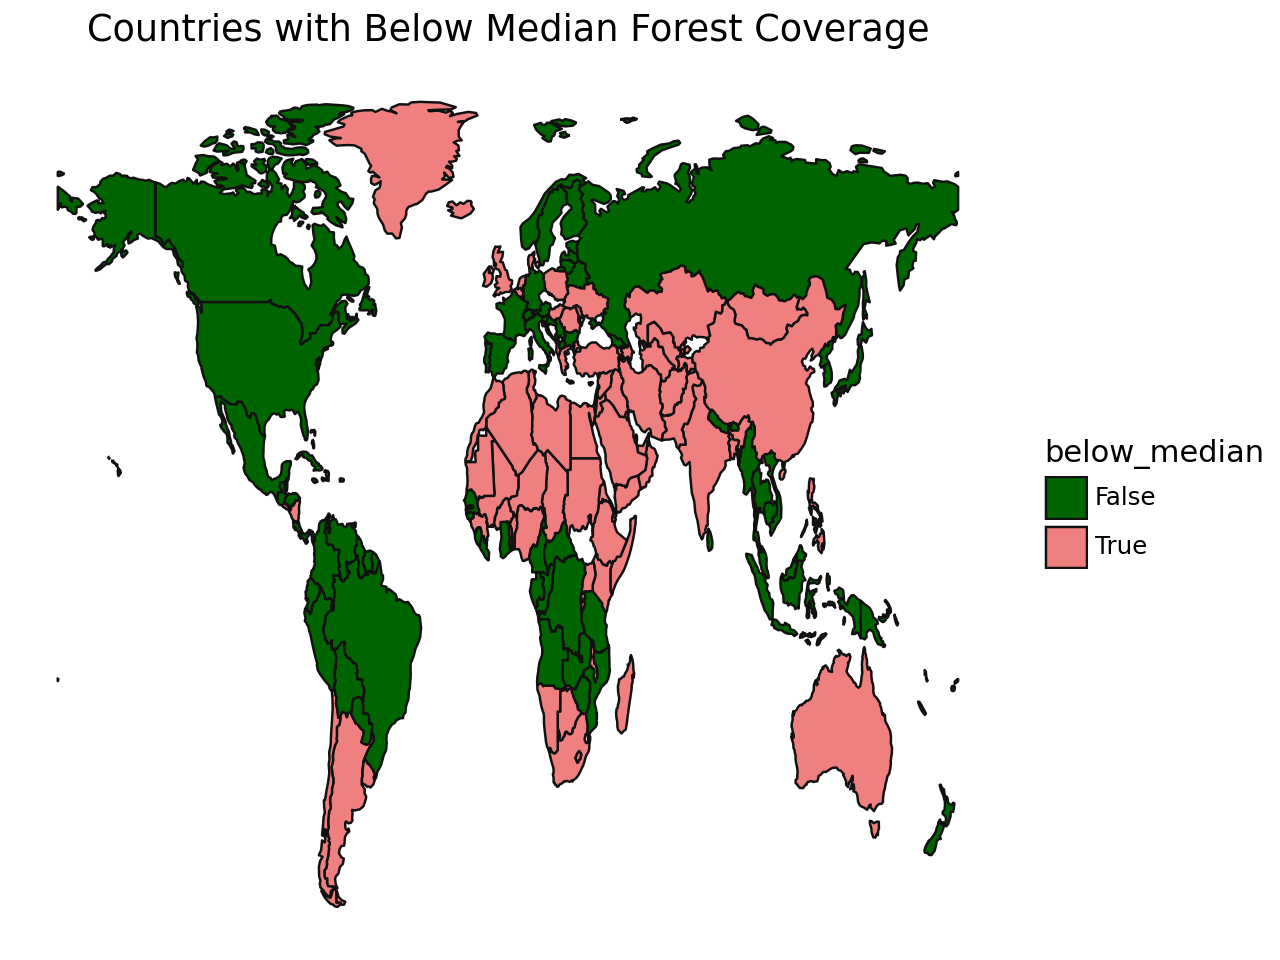

In [8]:
# Insert code here for visual 2
# Calculate the median forest coverage
median_forest_coverage = data_world_forest['2019_forest'].median()

# Create a new column to flag countries below the median forest coverage
data_world_forest['below_median'] = data_world_forest['2019_forest'] < median_forest_coverage

# Create a map where countries with below median forest coverage are highlighted
below_median_map = (
    ggplot(data_world_forest, aes(fill="below_median"))  # Use the 'below_median' column to fill colors
    + geom_map()  # Plot the map using geom_map
    + scale_fill_manual(values={True: "lightcoral", False: "darkgreen"})  # Color countries with below median as red, others as green
    + labs(title="Countries with Below Median Forest Coverage")  # Set the map title
    + theme(
        panel_background=element_rect(fill="white"),  # Set the background color to white
        axis_ticks=element_blank(),  # Remove axis ticks
        axis_text=element_blank()  # Remove axis text
    )
)

# Display the map
below_median_map
# Remember to print the visual 

*Brief motivation*

_The green color map emphasizes forest coverage, with darker shades indicating more coverage. Red and green colors highlight countries below and above the median._

### Question 2.4

On slide 22 in Lecture 3 (and on Canvas), there is a recreation using Swedish data of the famous cover page for the economist climate issue. Using the weather data on Canvas, recreate this visual.

**Hint 1**: You can use the following syntax to get the colours correct;

~~~
# Color palette 
color_list = [np.array([103,0,31]) / 256,
              np.array([178,24,43]) / 256, 
              np.array([214,96,77]) / 256, 
              np.array([244,165,130]) / 256, 
              np.array([253,219,199]) / 256, 
              np.array([247,247,247]) / 256, 
              np.array([209,229,240]) / 256, 
              np.array([146,197,222]) / 256, 
              np.array([67,147,195]) / 256, 
              np.array([33,102,172]) / 256, 
              np.array([5,48,97]) / 256]

# Used in the ggplot call 
# [::-1] reverses an array (I entered the color in wrong order :)
    + scale_fill_gradientn(colors=color_list[::-1], name = "Temperature [C]")
~~~


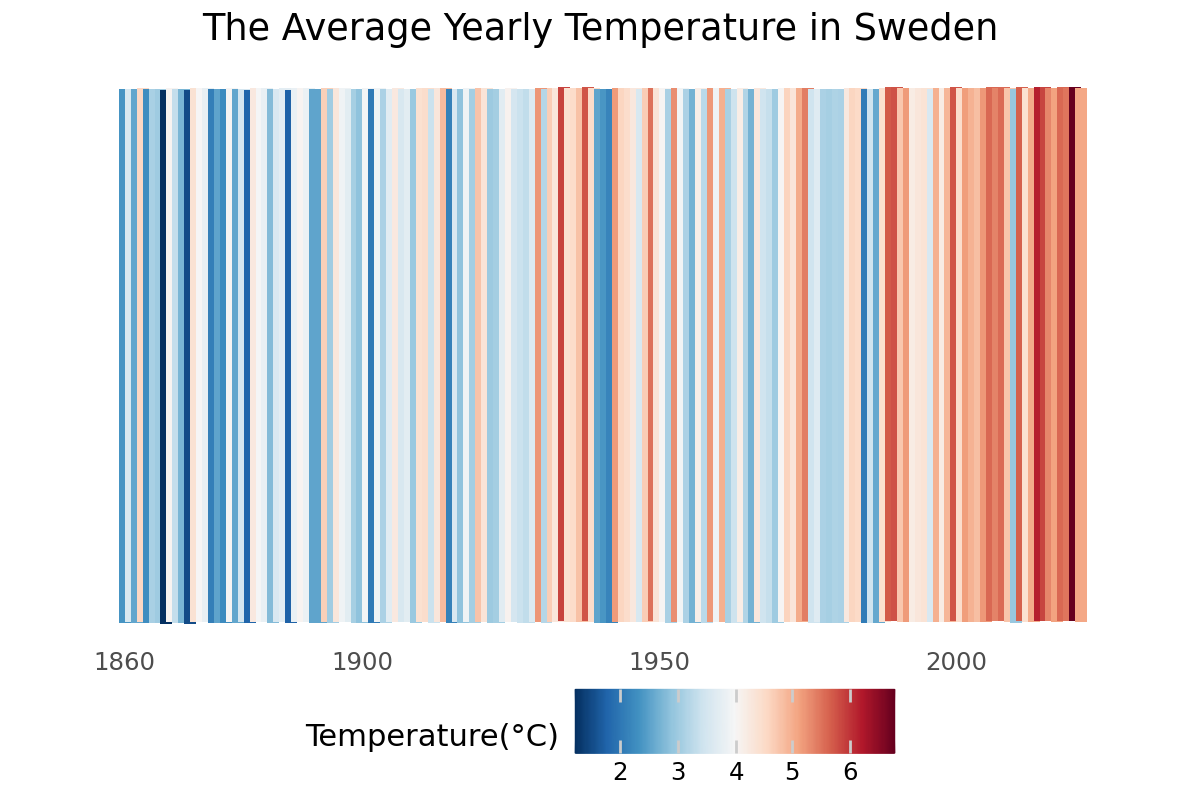

In [9]:
# Insert code here
# Color palette for temperature gradient
temperature_colors = [
    np.array([103, 0, 31]) / 256, 
    np.array([178, 24, 43]) / 256,
    np.array([214, 96, 77]) / 256, 
    np.array([244, 165, 130]) / 256, 
    np.array([253, 219, 199]) / 256, 
    np.array([247, 247, 247]) / 256, 
    np.array([209, 229, 240]) / 256, 
    np.array([146, 197, 222]) / 256, 
    np.array([67, 147, 195]) / 256, 
    np.array([33, 102, 172]) / 256, 
    np.array([5, 48, 97]) / 256
]

# Load the dataset
weather_data = pd.read_csv("Weather_avg.csv")

# Create the plot with ggplot
plot = (
    ggplot(weather_data, aes('Year', 'AvgT', fill='AvgT'))  # Set aesthetics
    + geom_tile(aes(height=1000, width=2), position='dodge')  # Add tiles with dodge position
    + scale_fill_gradientn(colors=temperature_colors[::-1], name="Temperature(°C)")  # Apply color gradient
    + scale_x_continuous(limits=[1850, 2030], breaks=[1860, 1900, 1950, 2000])  # Define x-axis limits and breaks
    + theme_minimal()  # Use a minimal theme
    + labs(x='', y='', title='The Average Yearly Temperature in Sweden')  # Title and axis labels
    + theme(
        axis_text_y=element_blank(),  # Remove y-axis text
        axis_ticks=element_blank(),  # Remove axis ticks
        axis_ticks_length=0,  # Remove tick marks
        legend_position='bottom',  # Move the legend to the bottom
        figure_size=(6, 4),  # Set figure size
        panel_grid_major=element_blank(),  # Remove major grid lines
        panel_grid_minor=element_blank(),  # Remove minor grid lines
        axis_line=element_blank(),  # Remove axis lines
    )
)

# Display the plot
plot
# Remember to print the visual 

## Time-series

For this part reading chapter 13 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.



### Question 3.1

In the lecture, I showed how we can use points, lines or both to visualise a single time series. Another way is to use area (Fig. 13.4 in the [course book](https://clauswilke.com/dataviz/)). Using the inflation data (on Canvas), choose a country and visualise its inflation over time using i) dots, ii) lines and iii) line with area shaded under it. Briefly discuss the benefit of also including the area.

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2013 2015 2016 2017 2018 2019 2020]


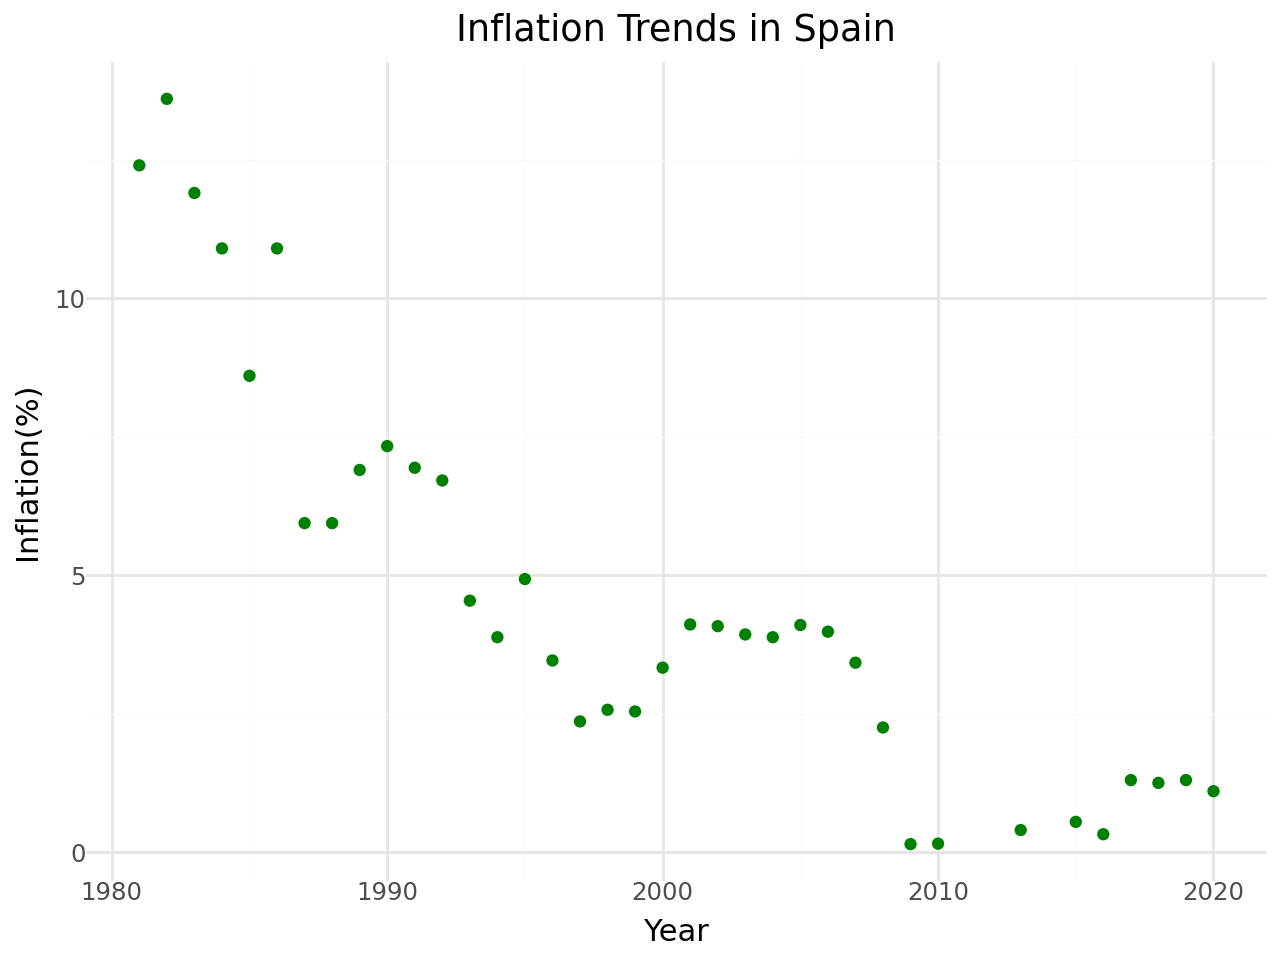

In [10]:
# Insert code here for dots
# Load data
data = pd.read_csv('Inflation_data_homework.csv')

# Filter for Spain's data
data_spain = data[data['country'] == 'Spain']

# Print unique years for inflation data
print(data_spain['Year'].unique())

# Create the inflation plot
plot = (ggplot(data_spain, aes('Year', 'Inflation'))  # Set x and y axes
        + labs(y='Inflation(%)', x='Year', title='Inflation Trends in Spain')  # Add axis labels and title
        + geom_point(color='green')  # Add scatter points with green color
        + theme_minimal())  # Apply minimal theme

# Display the plot
plot
# Remember to print the visual 

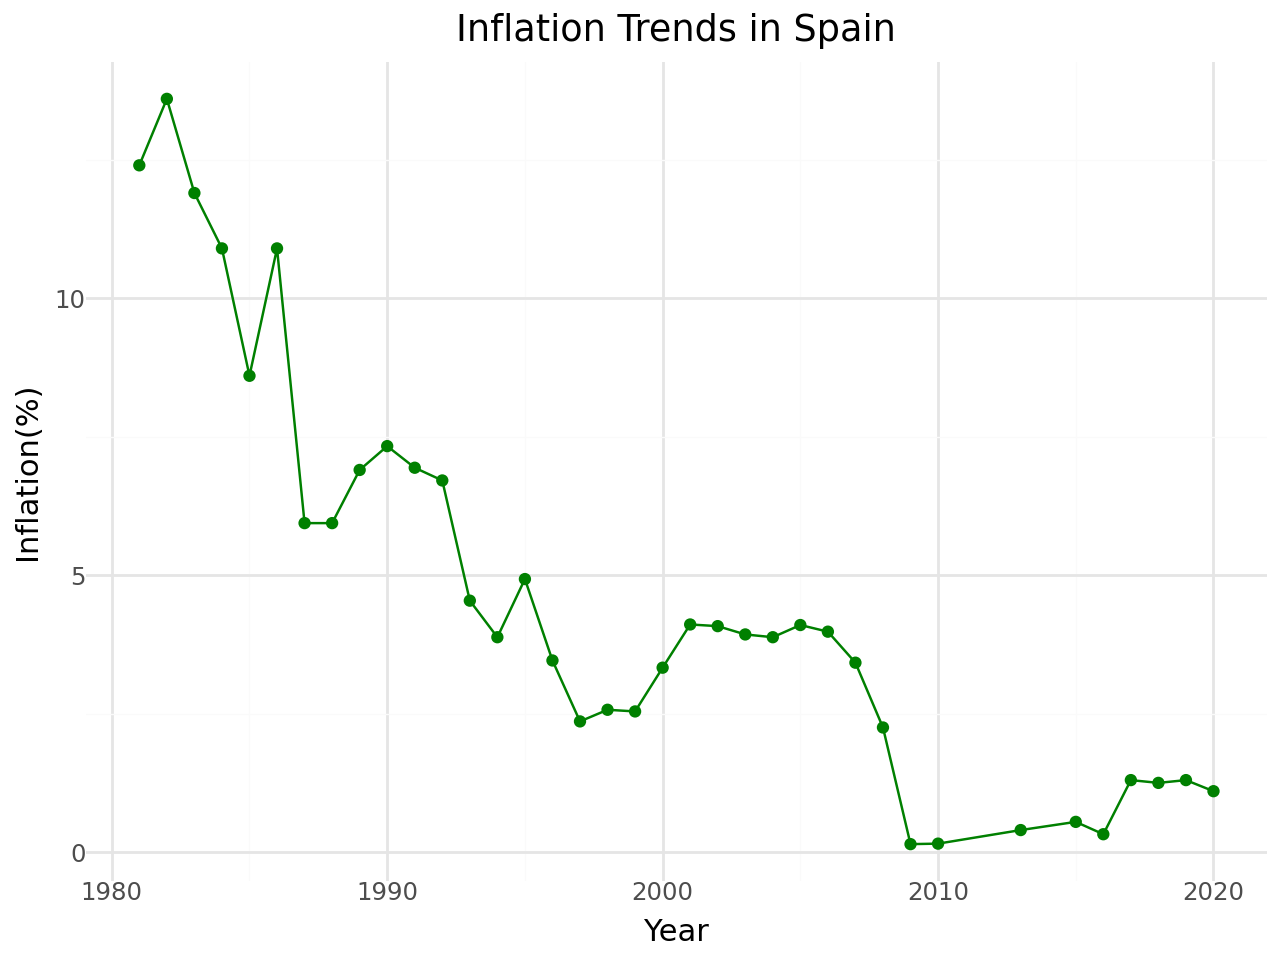

In [11]:
# Insert code here for lines
# Create the inflation plot with green points and a connecting line
plot = (ggplot(data_spain, aes('Year', 'Inflation'))  # Set x and y axes
        + labs(y='Inflation(%)', x='Year', title='Inflation Trends in Spain')  # Add axis labels and title
        + geom_point(color='green')  # Add scatter points with green color
        + geom_line(color='green')  # Add a connecting line with green color
        + theme_minimal())  # Apply minimal theme

plot
# Remember to print the visual 

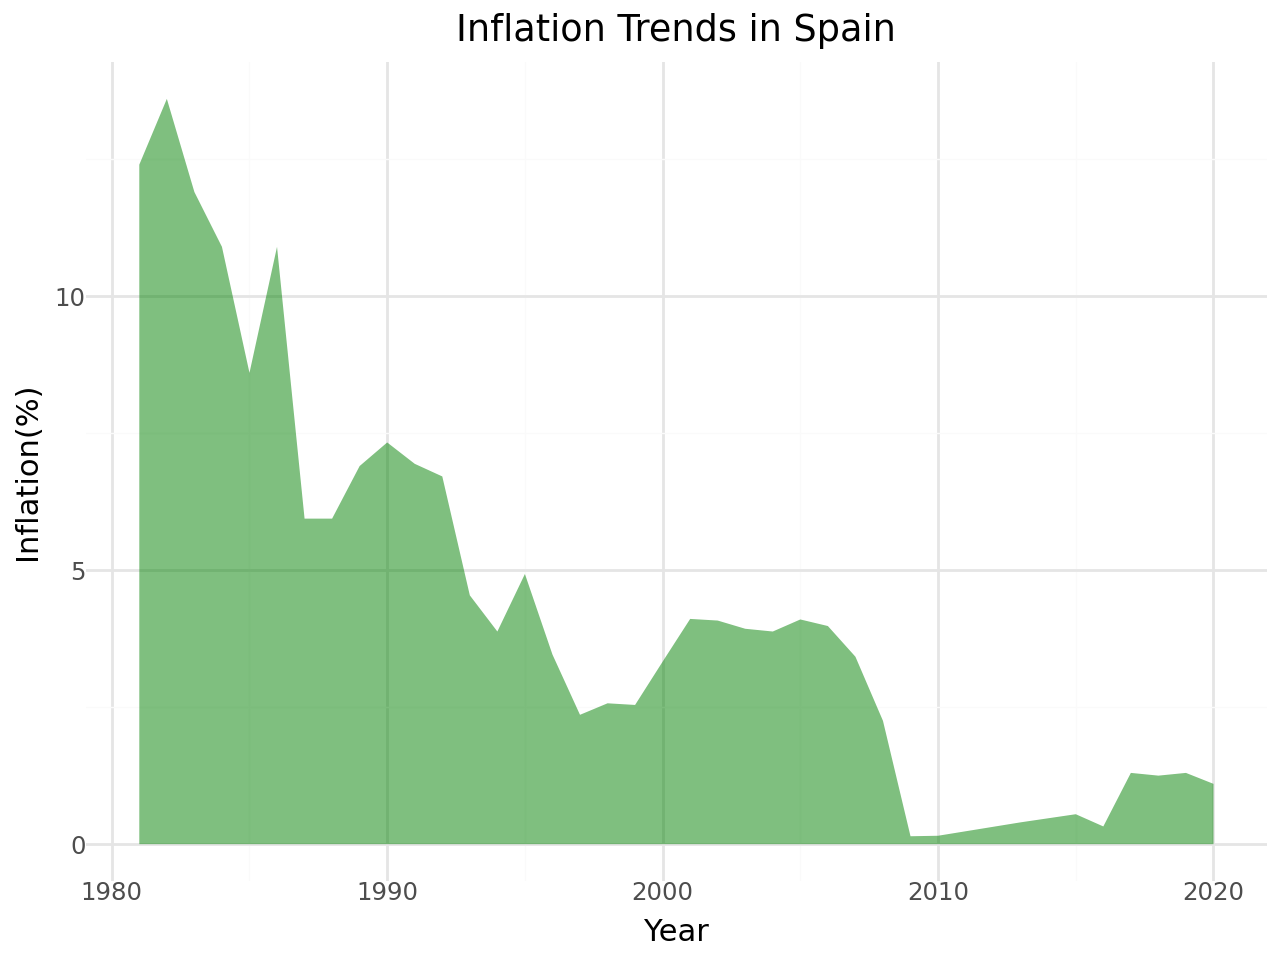

In [12]:
# Insert code here for area
# Create the inflation plot using an area plot
plot = (ggplot(data_spain, aes('Year', 'Inflation'))  # Set x and y axes
        + labs(y='Inflation(%)', x='Year', title='Inflation Trends in Spain')  # Add axis labels and title
        + geom_area(fill='green', alpha=0.5)  # Add area plot with green fill and transparency
        + theme_minimal())  # Apply minimal theme

plot
# Remember to print the visual 

*Brief motivation*

_Dots: Clearly show individual data points, allowing precise identification of values._

_Line: Highlights trends or changes over time, making it easier to follow the progression between data points._

_Area: Emphasizes the magnitude of values by filling the space under the curve, making the total contribution visually intuitive._

### Question 3.2

Using the inflation data, choose 7 countries and visualise in a single plot (you are allowed to use facets) their inflation over time. I recommend a you-are-here graphic (slide 12 Lecture 4). 

Briefly motivate your choice of plot.

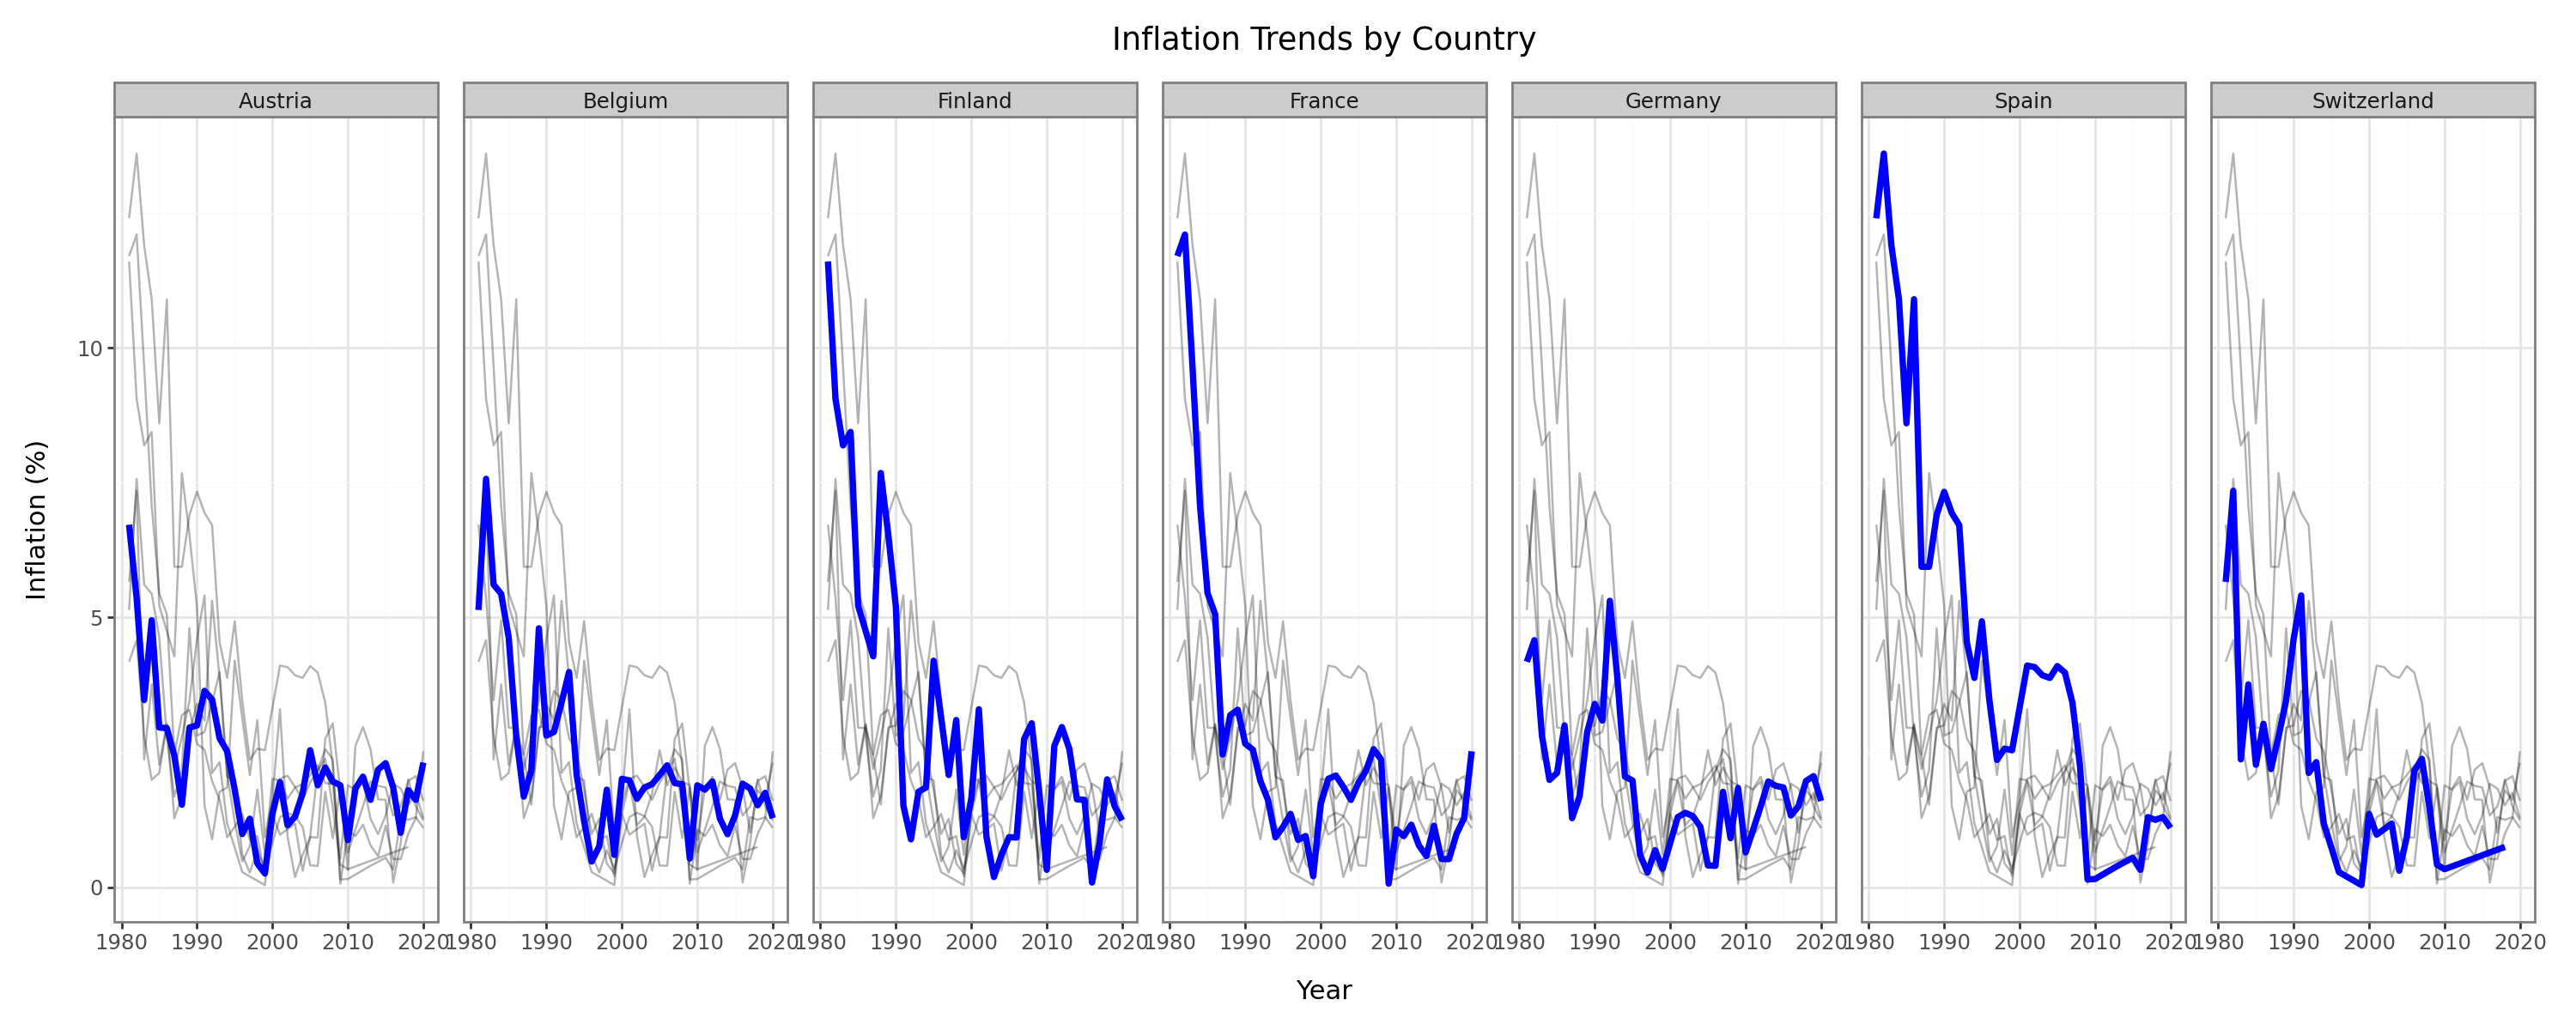

In [13]:
# Insert code here 
# Step 1: Load data and filter for specific countries
data = pd.read_csv('Inflation_data_homework.csv')  # Load the dataset
selected_countries = ["Austria", "Belgium", "France", "Switzerland", "Germany", "Spain", "Finland"]  # Specific countries
filtered_data = data.query('country in @selected_countries')  # Filter data for the selected countries

# Step 2: Prepare overlay data for background lines
# Filter overlay_data to include only the selected countries
overlay_data = filtered_data.copy()  # Use only data for selected countries
overlay_data['country_overlay'] = overlay_data['country']  # Create a copy of 'country' column for grouping
overlay_data.drop('country', axis=1, inplace=True)  # Remove the original 'country' column

# Step 3: Create the plot
plot = (ggplot(filtered_data, aes('Year', 'Inflation'))  # Define axes
        + geom_line(  # Add background lines for selected countries
            data=overlay_data, 
            mapping=aes(x='Year', y='Inflation', group='country_overlay'), 
            size=0.5, 
            alpha=0.3  # Make background lines semi-transparent
          )
        + geom_line(  # Add highlighted lines for selected countries
            aes(group='country'), 
            size=1.5,
            color='blue'  # Highlight lines in blue for better visibility
          )
        + facet_wrap('~country', nrow=1)  # Create a facet plot for each country
        + labs(x='Year', y='Inflation (%)', title='Inflation Trends by Country')  # Add labels and title
        + theme_bw()  # Apply a theme
        + theme(figure_size=(15, 6))  # Adjust figure size
       )

# Display the plot
plot
# Remember to print the visual 

*Brief motivation*

_This combination of line plots and faceting helps to clearly convey the inflation trends of the selected countries over time. By using faceting, each country’s inflation trend is displayed in its own subplot. The facet grid ensures that trends are visible without cluttering the plot, which is especially useful when comparing multiple countries._

### Question 3.3 

The connected scatter plot (Fig. 13.10 in the [course book](https://clauswilke.com/dataviz/)) is an approach that allows us to visualise two separate time-dependent variables. On the webpage, I have uploaded an example for a connected scatter plot where I plot unemployment rate and apartment prices for Sweden from 1996-2020. Use the dataset on Canvas to recreate this visual. Briefly comment what you think is the main takeaway message from the plot. 

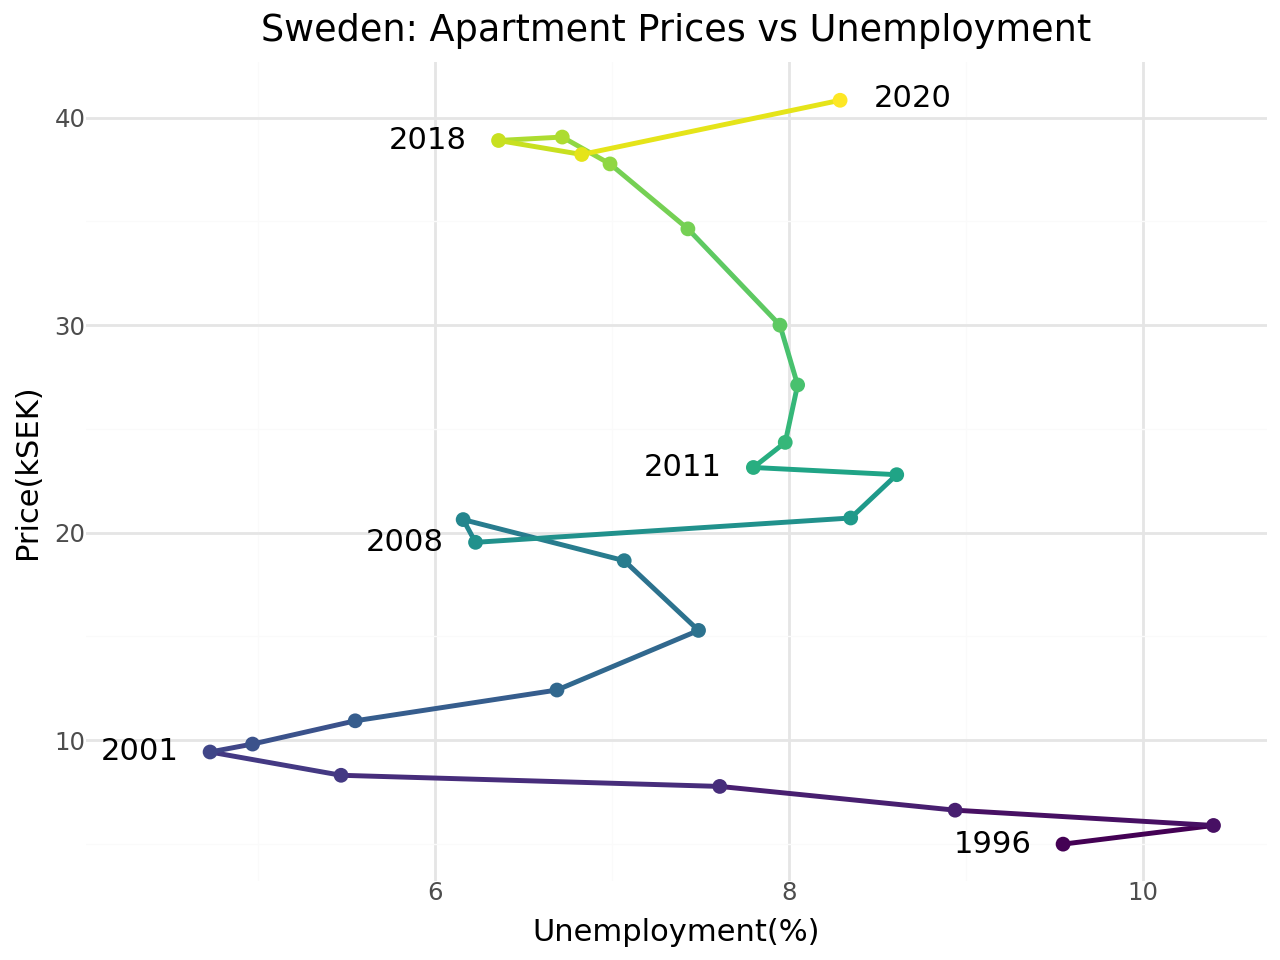

In [14]:
# Insert code here
# Load the dataset and filter specific years
df = pd.read_csv('House_unemployed.csv')  # Load dataset
years_of_interest = [1996, 2001, 2008, 2011, 2018]  # Specific years to highlight
highlight_data = df.query('Year in @years_of_interest')  # Filter data for the selected years

# Create the plot
plot = (ggplot(df, aes(x='price/1000', y='Unemployment', color='Year'))  # Define axes and color by Year
        + geom_path(show_legend=False, size=1)  # Line connecting the points, without legend
        + geom_point(show_legend=False, size=2)  # Scatter points, without legend
        + labs(x='Price(kSEK)', y='Unemployment(%)', title='Sweden: Apartment Prices vs Unemployment')  # Labels and title
        + geom_text(data=highlight_data,  # Add labels for selected years
                    mapping=aes(x='price/1000', y='Unemployment', label=['1996', '2001', '2008', '2011', '2018']),
                    show_legend=False,
                    nudge_y=-0.4,  # Adjust label position
                    color='black'
                    )
        + annotate('text', x=40.9, y=8.7, label='2020')  # Add custom annotation
        + coord_flip()  # Flip the coordinates for better visualization
        + theme_minimal()  # Apply minimal theme
       )

# Display the plot
plot

# Remember to print the visual 

*Brief motivation*

_Apartment prices continue to rise, regardless of whether the unemployment rate increases or decreases._

## Proportions 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Consider the Swedish election data from 2010 and 2014 which I have added below. Visualize the data such that it is easy to see, in a single plot, which was the third biggest party in 2010 and 2014.


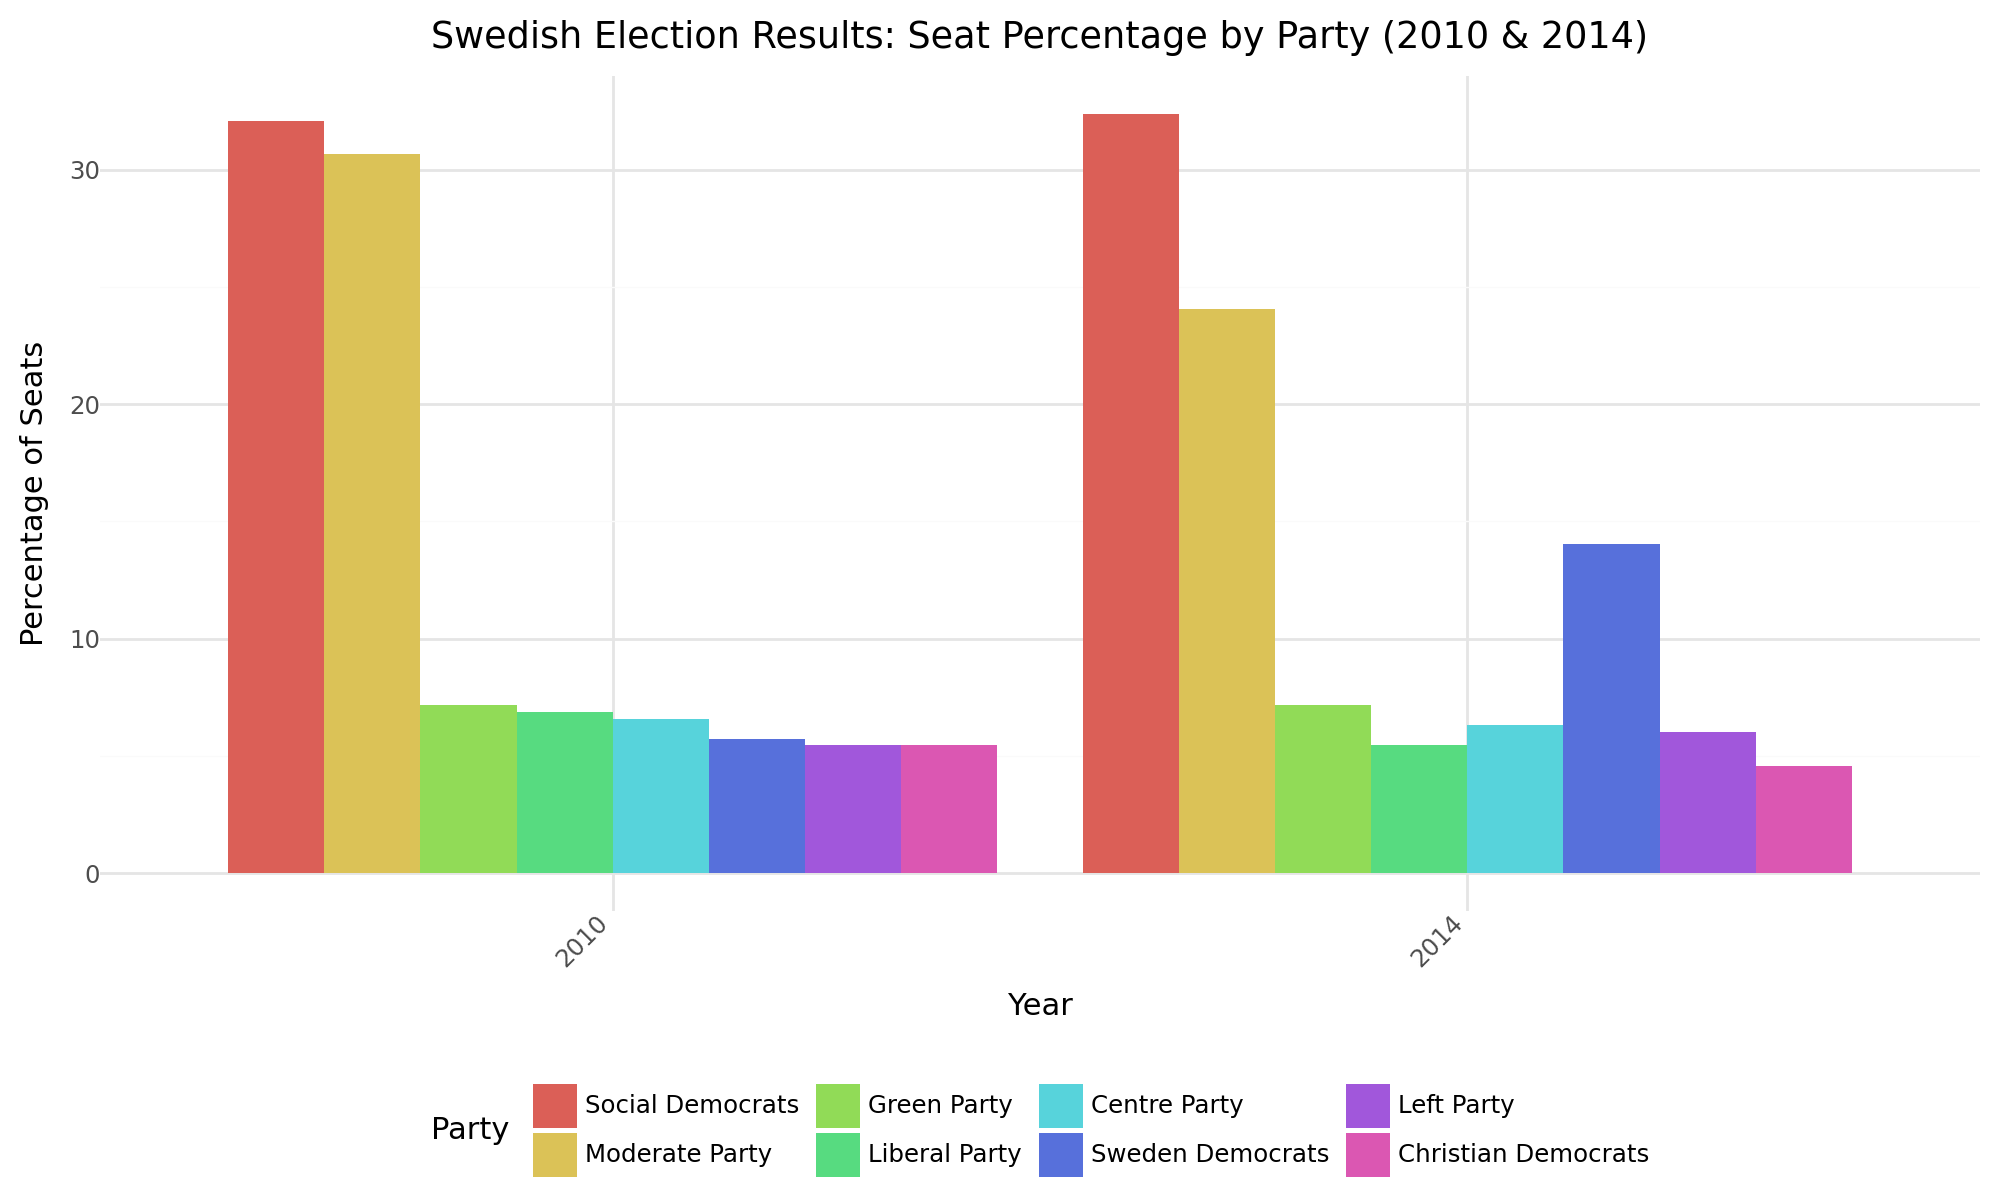

In [15]:
swedish_election_2010 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [112, 19, 25, 23, 24, 107, 19, 20],
                                      "Year" : 2010, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2014 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [113, 21, 25, 22, 19, 84, 16, 49],
                                      "Year" : 2014, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2010["Frac_seats"] = swedish_election_2010["Number_of_seats"] / np.sum(swedish_election_2010["Number_of_seats"]) * 100
swedish_election_2014["Frac_seats"] = swedish_election_2014["Number_of_seats"] / np.sum(swedish_election_2014["Number_of_seats"]) * 100

data_election = pd.concat([swedish_election_2010, swedish_election_2014])

# Define the party order for elections
party_order = [
    'Social Democrats', 'Moderate Party', 'Green Party', 
    'Liberal Party', 'Centre Party', 'Sweden Democrats', 
    'Left Party', 'Christian Democrats'
]

# Assign categorical data for party and year with specific order
data_election = data_election.assign(
    Party=pd.Categorical(data_election['Party'], categories=party_order),
    Year=pd.Categorical(data_election['Year'])
)

# Create the bar plot
election_plot = (
    ggplot(data_election, aes(x='Year', y='Frac_seats', group='Party', fill='Party'))
    + geom_bar(position='dodge', stat='identity')  # Dodge to separate bars by Party
    + labs(
        y='Percentage of Seats', 
        title='Swedish Election Results: Seat Percentage by Party (2010 & 2014)'
    )
    + theme_minimal()  # Use a clean theme
    + theme(
        legend_position='bottom',  # Move the legend below the plot
        figure_size=(10, 6),       # Adjust figure size
        axis_text_x=element_text(rotation=45, hjust=1)  # Rotate x-axis labels for clarity
    )
)

# Display the plot
election_plot

# Remember to print the visual 


### Question 4.2

In the lecture, we discuss that stalked charts (e.g. stacked densities or stacked bars) often do not work if we want to study individual parts. Consider the stacked density graph on slide 29 in Lecture 3. Using the data on Canvas, create two different plots from which it is easier to see how the fraction GDP for the different has changed over the years.

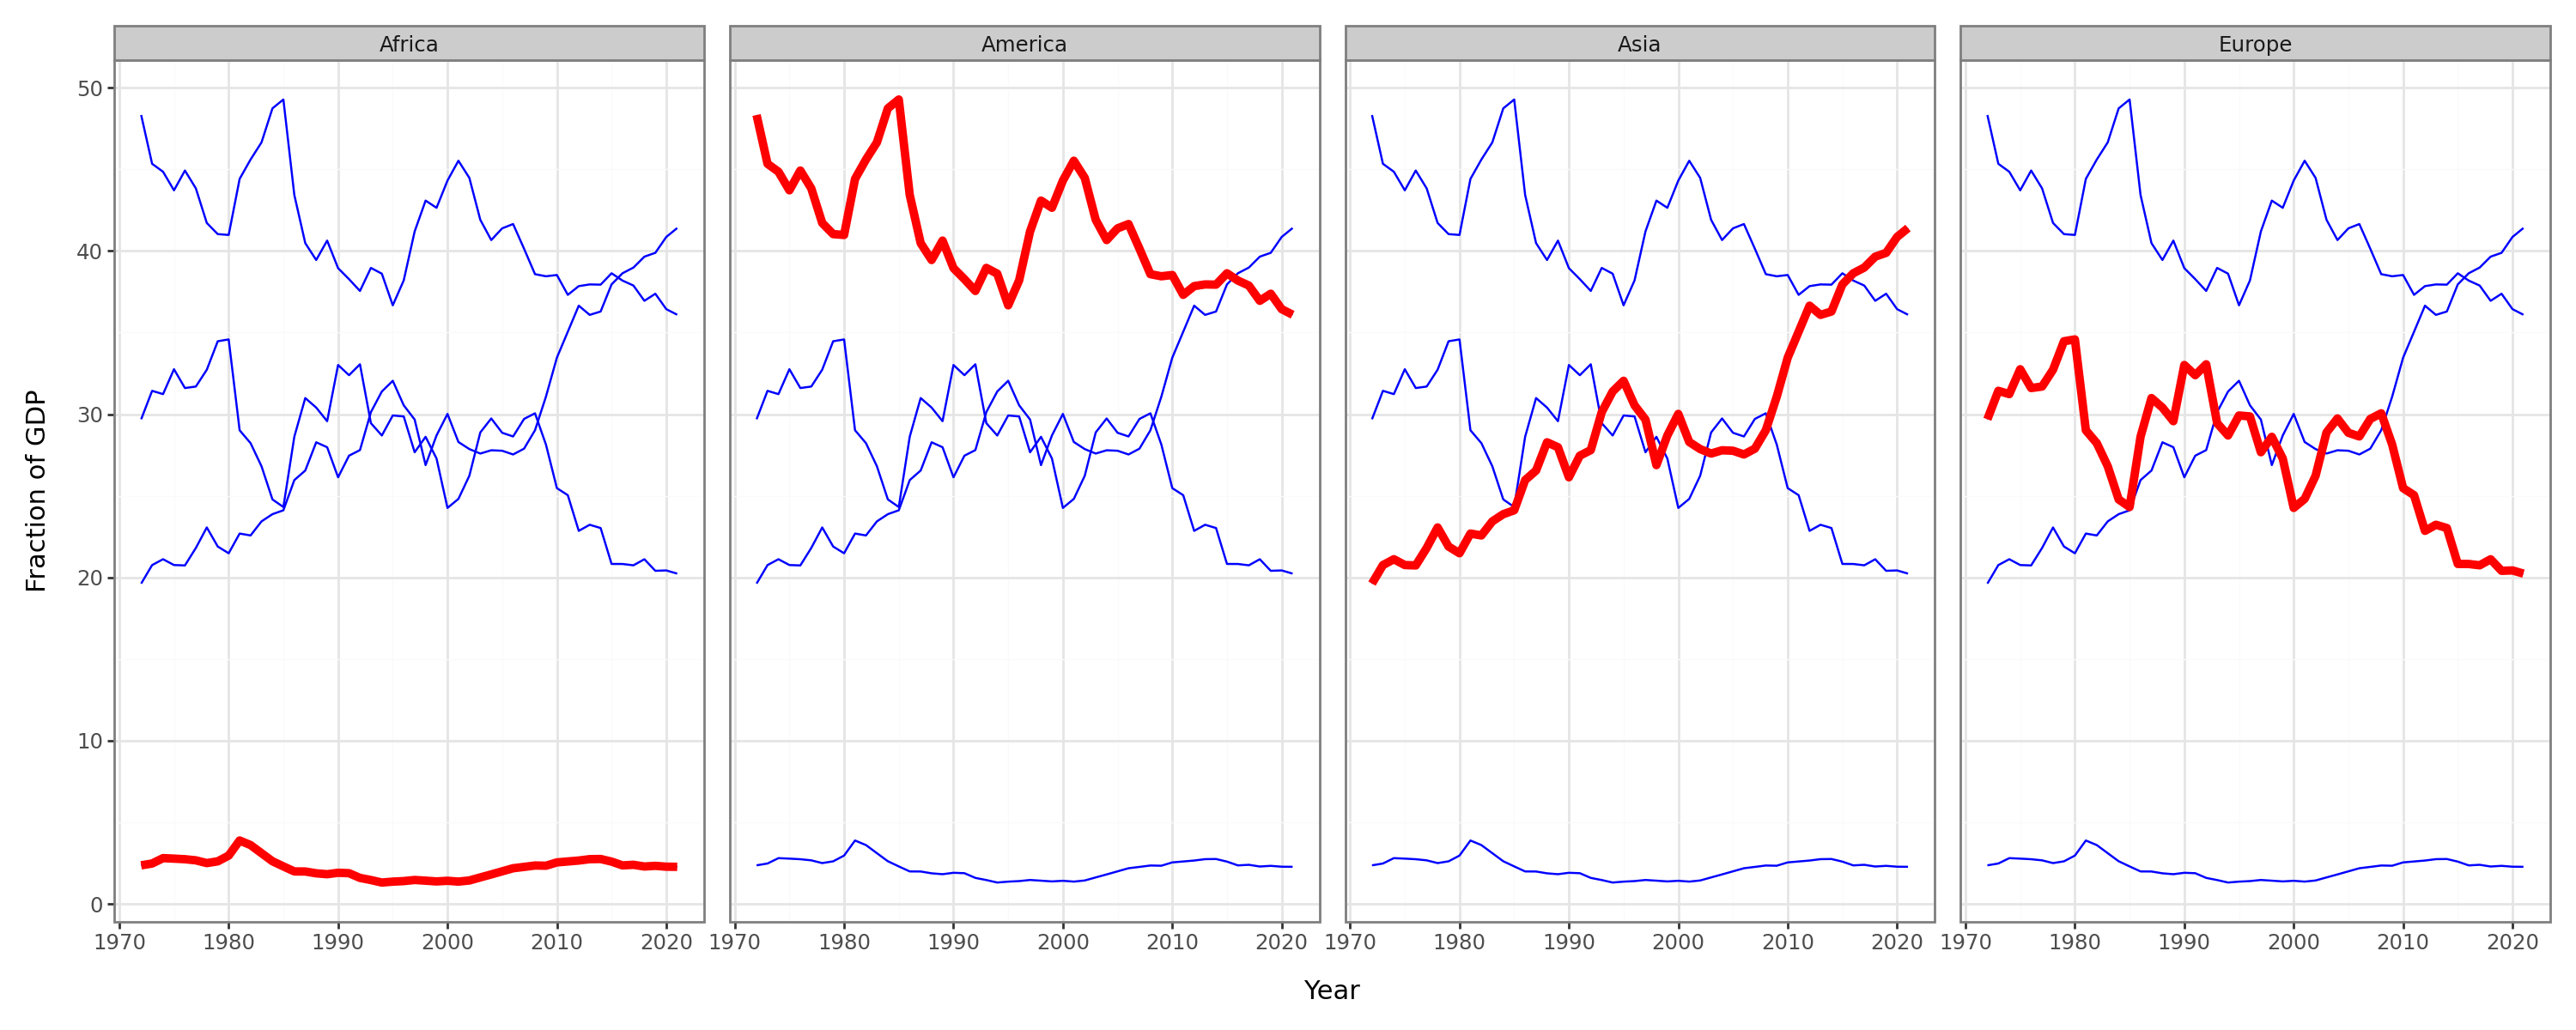

In [16]:
# Insert code here visual 1 
# Read the CSV file into a DataFrame
gdp_data = pd.read_csv('GDP_tidy-1.csv')

# Rename the 'part_of_world' column to 'continent' for better clarity
gdp_data = gdp_data.rename(columns={'part_of_world': 'continent'})

# Convert 'continent' to categorical for better handling in plot
gdp_data['continent'] = pd.Categorical(gdp_data['continent'])

# Create a copy of the data, remove the original 'continent' column, and create a new column
gdp_data_copy = gdp_data.copy()
gdp_data_copy['continent_copy'] = gdp_data_copy['continent']
gdp_data_copy = gdp_data_copy.drop('continent', axis=1)

# Create the plot
gdp_plot = (
    ggplot(gdp_data, aes(x='year', y='frac_gdp'))  # Use the original data for the base plot
    + geom_line(
        data=gdp_data_copy, 
        mapping=aes(x='year', y='frac_gdp', group='continent_copy'), 
        size=0.5, 
        color='blue'  # Highlight lines for individual continents (using blue)
    )
    + geom_line(
        aes(group='continent'), 
        color='red',  # Highlight the overall continental trend (using red)
        size=2
    )
    + facet_wrap('~continent', nrow=1)  # Facet by continent, arranging them in one row
    + labs(x='Year', y='Fraction of GDP')  # Axis labels
    + theme_bw()  # Clean black-and-white theme
    + theme(figure_size=(15, 6))  # Adjust figure size for clarity
)

# Display the plot
gdp_plot
# Remember to print the visual 

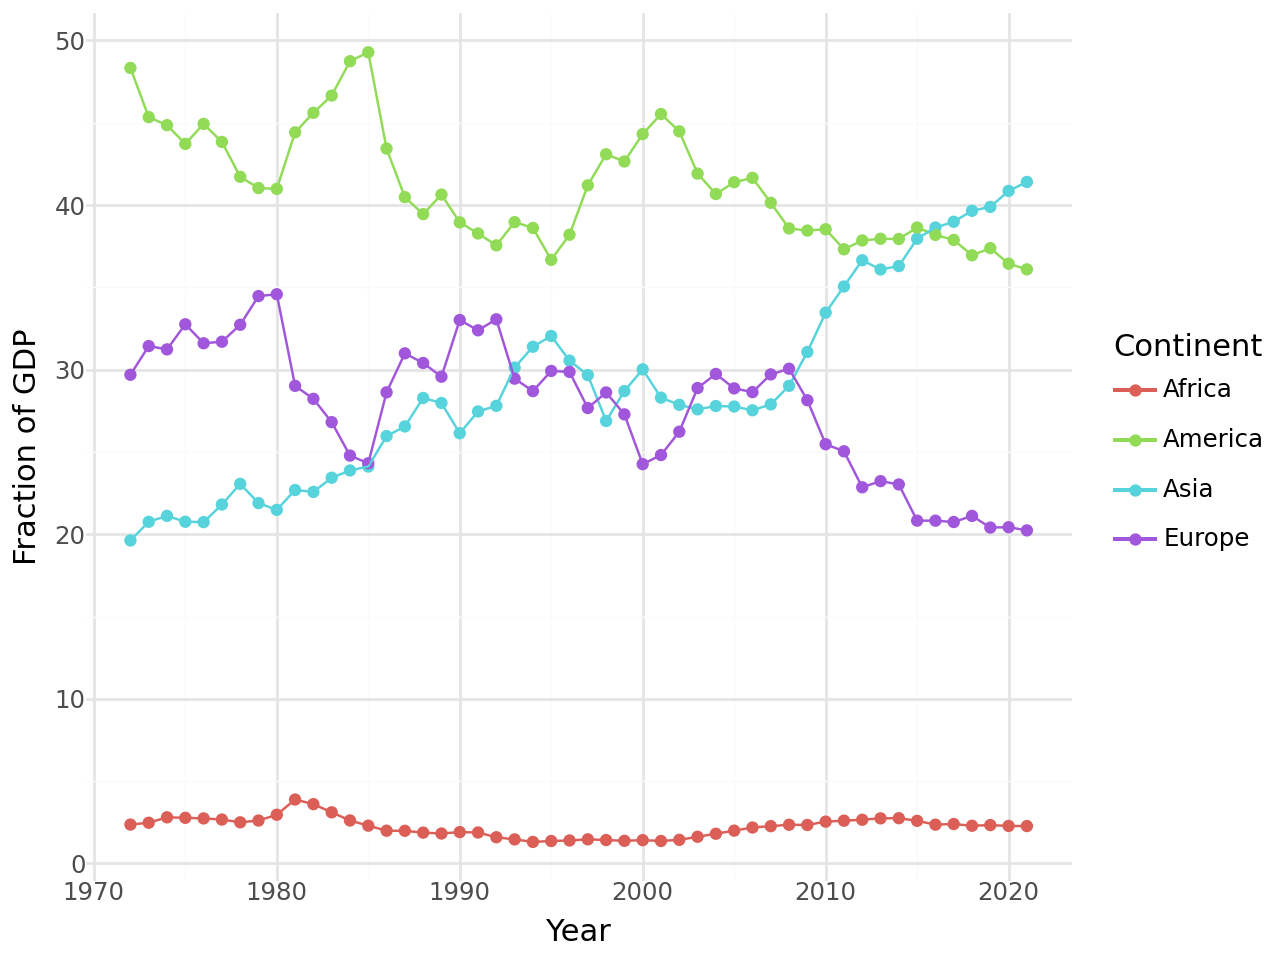

In [17]:
# Insert code here visual 2 
# Load the dataset
gdp_data = pd.read_csv('GDP_tidy-1.csv')

# Rename the column for clarity and assign 'continent' as a categorical variable
gdp_data = gdp_data.rename(columns={'part_of_world': 'continent'})
gdp_data['continent'] = pd.Categorical(gdp_data['continent'])

# Create the plot
gdp_plot = (
    ggplot(gdp_data, aes(x='year', y='frac_gdp', color='continent'))  # Set the aesthetics
    + geom_point()  # Scatter plot
    + geom_line()  # Line plot to connect points
    + labs(x='Year', y='Fraction of GDP', color='Continent')  # Labels for the axes and color legend
    + theme_minimal()  # Minimal theme for a clean look
)

# Display the plot
gdp_plot
# Remember to print the visual 

### Question 4.3

In some cases a stacked chart works well. On Canvas, I have uploaded one such example. Use the Canvas dataset recreate this visual.


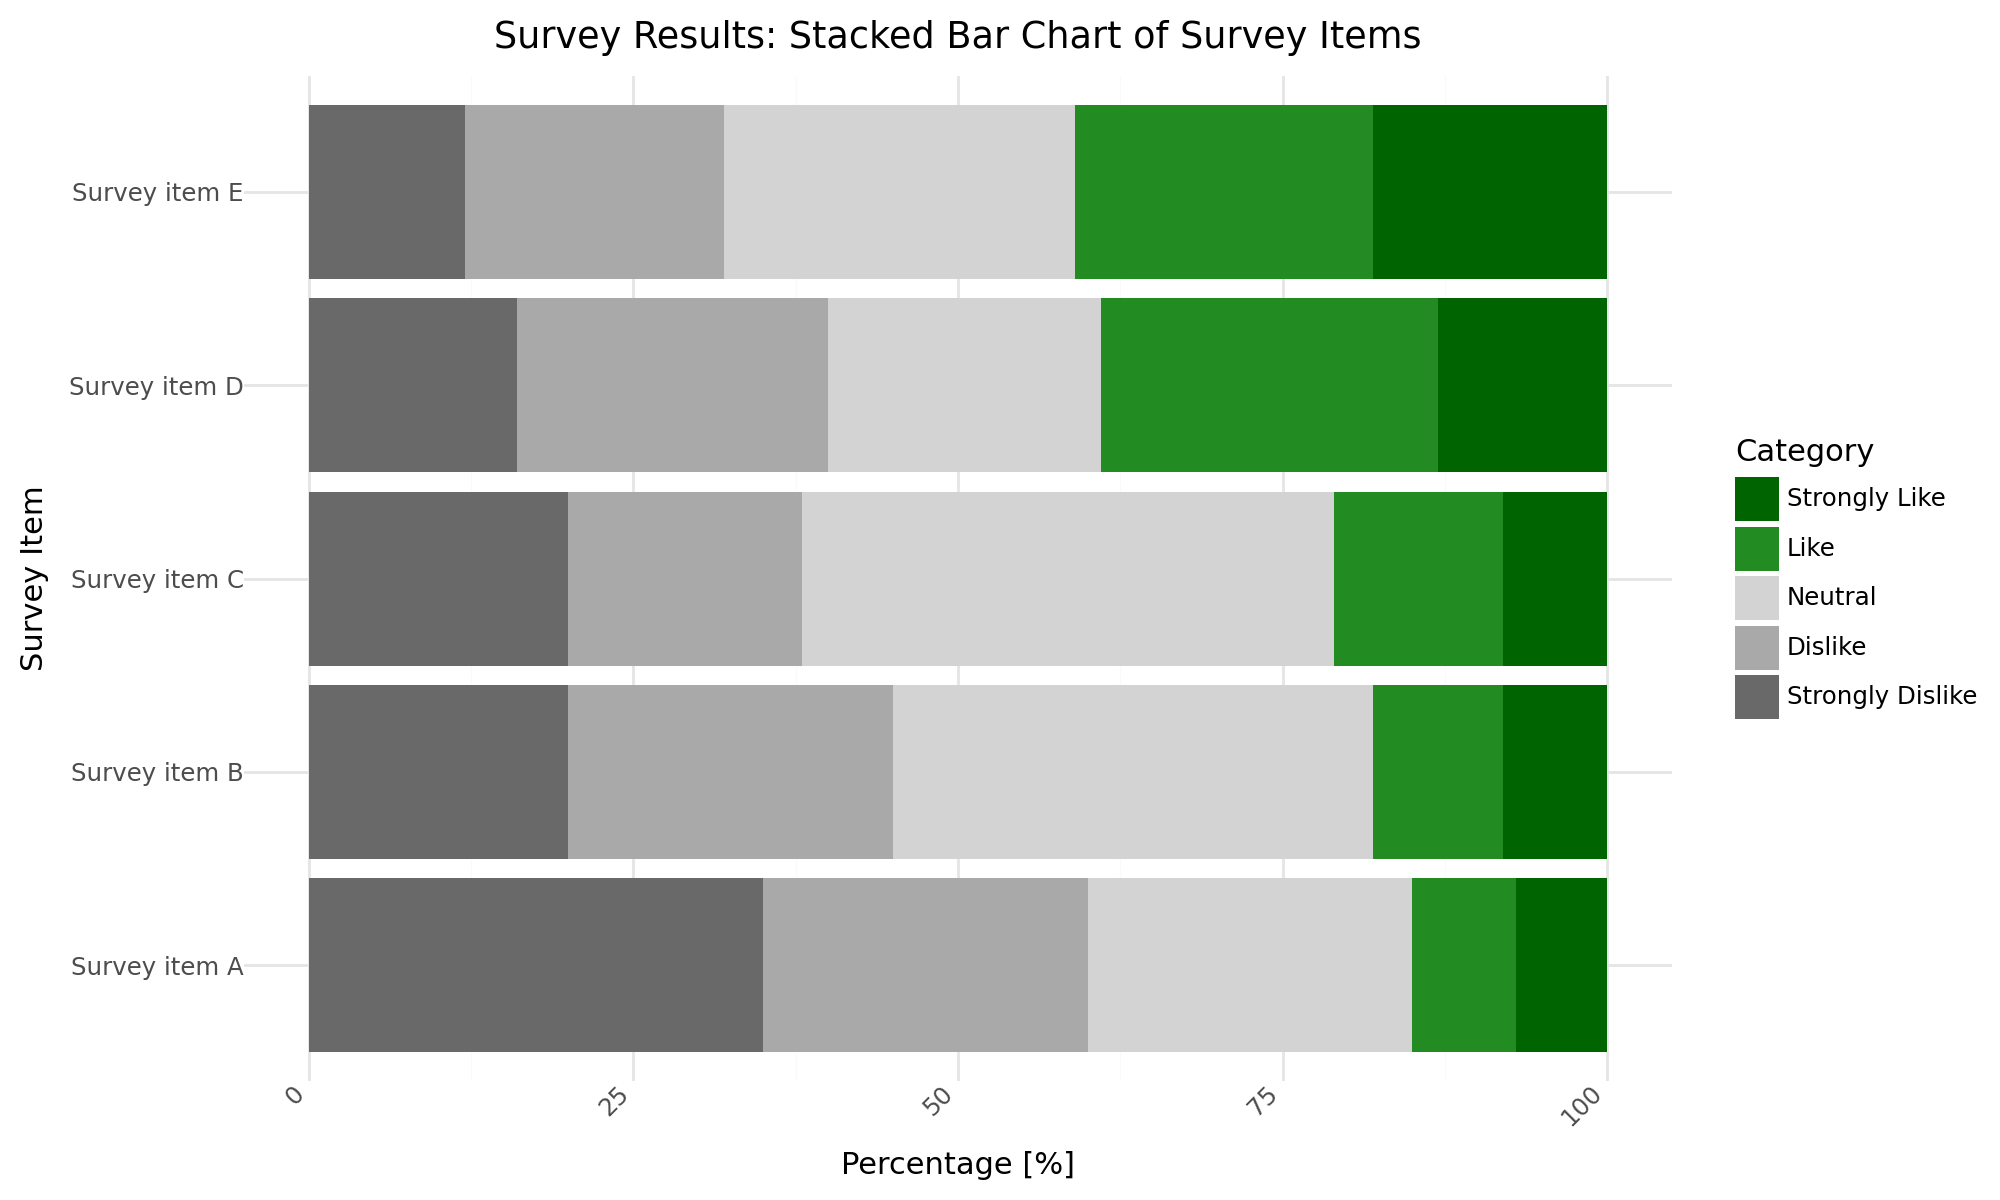

In [18]:
# Insert code here visual
# Read the CSV data
df = pd.read_csv('Stacked_good_hw.csv')

# Set the 'Item' column as a categorical variable with a specific order
df['Item'] = pd.Categorical(df['Item'], categories=['Survey item A', 'Survey item B', 'Survey item C', 'Survey item D', 'Survey item E'], ordered=True)

# Convert the 'category' column to an ordered categorical variable
df['category'] = pd.Categorical(df['category'], categories=['Strongly Like', 'Like', 'Neutral', 'Dislike', 'Strongly Dislike'], ordered=True)

# Create the plot with flipped axes
plot = (
    ggplot(df, aes(y='proportion', x='Item', fill='category'))  # Flip axes: proportion on y, Item on x
    + geom_bar(stat='identity', position='stack')  # Stack bars to represent proportions of each category
    + scale_fill_manual(values=['#006400', '#228B22', '#D3D3D3', '#A9A9A9', '#696969'])  # Customize colors for each category
    + labs(x='Survey Item', y='Percentage [%]', fill='Category', title='Survey Results: Stacked Bar Chart of Survey Items')  # Labels and title
    + theme_minimal()  # Minimalistic theme
    + theme(axis_text_x=element_text(rotation=45, ha='right'),  # Rotate x-axis labels for better readability
            figure_size=(10, 6))  # Adjust the figure size
    + coord_flip()  # Flip the coordinates to switch x and y axes
)

# Display the plot
plot
# Remember to print the visual 

## Assocations 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 5.1 

Using the dataset with different indicators, such as life-happiness, perception of corruption etc..., compare two variables using a scatter plot. Briefly discuss the take-away from the visual. In the plot colour the different continents.

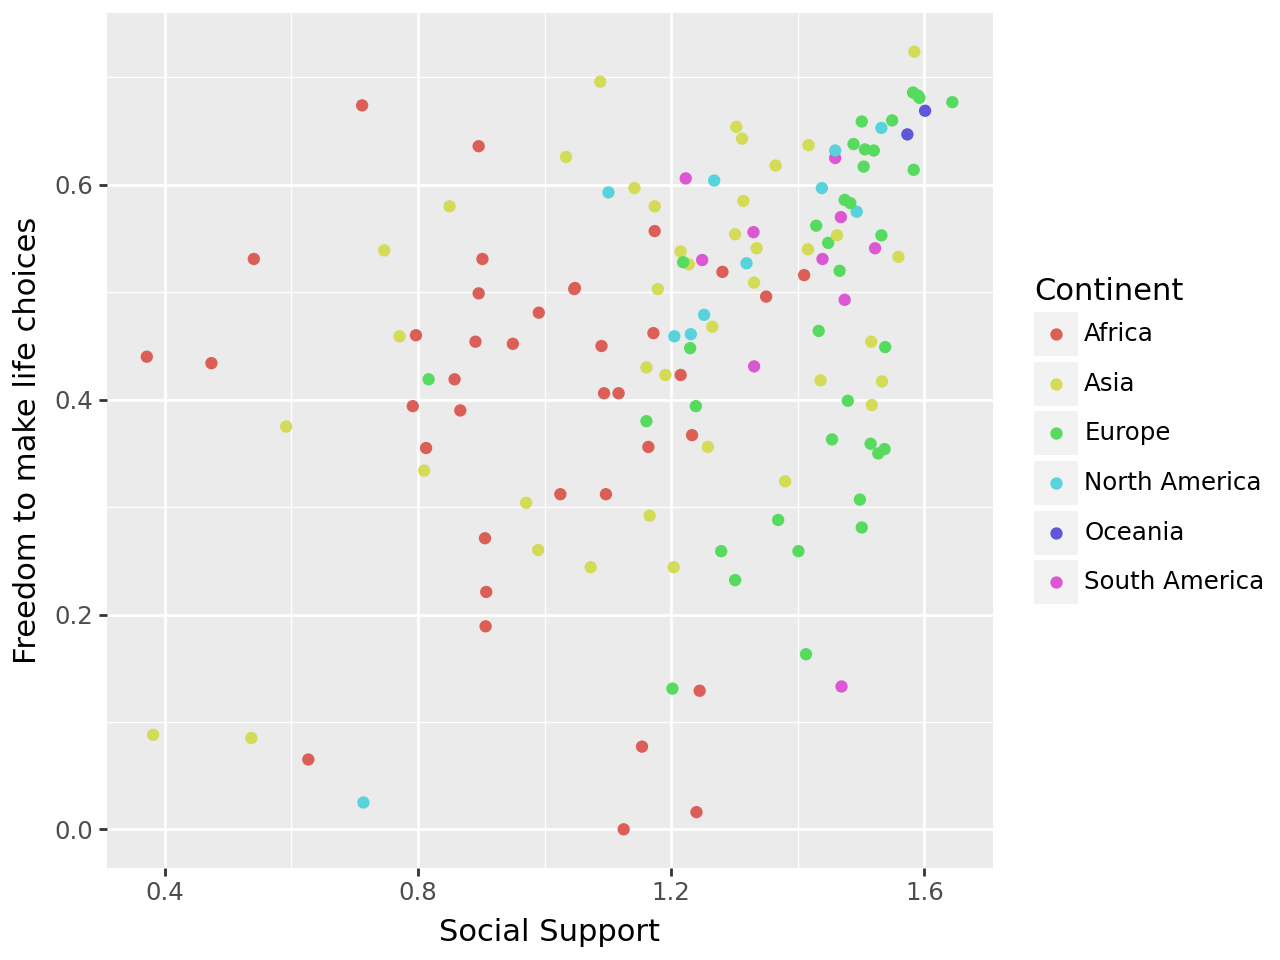

In [19]:
# Insert code here
# # Load the dataset from the CSV file
data = pd.read_csv('World_2018-1.csv')

# Create a scatter plot with the variables Social_support and Healthy_life_expectancy, grouped by continent
plot = (ggplot(data, aes(x='Social_support', y='Freedom_to_make_life_choices', color='continent'))
        + geom_point()
        + labs(x='Social Support', y='Freedom to make life choices', color='Continent'))

# Display the plot
plot 
# Remember to print the visual 

*Brief motivation*

_It seems that countries with high social support also tend to score higher on freedom to make life choices._

### Question 5.2 

Let us explore the dataset in question 5.1 a bit deeper. Choose five different variables and create two different visuals where we can clearly see the associations between all pair of variables. Briefly discuss the take-away from the visual. 

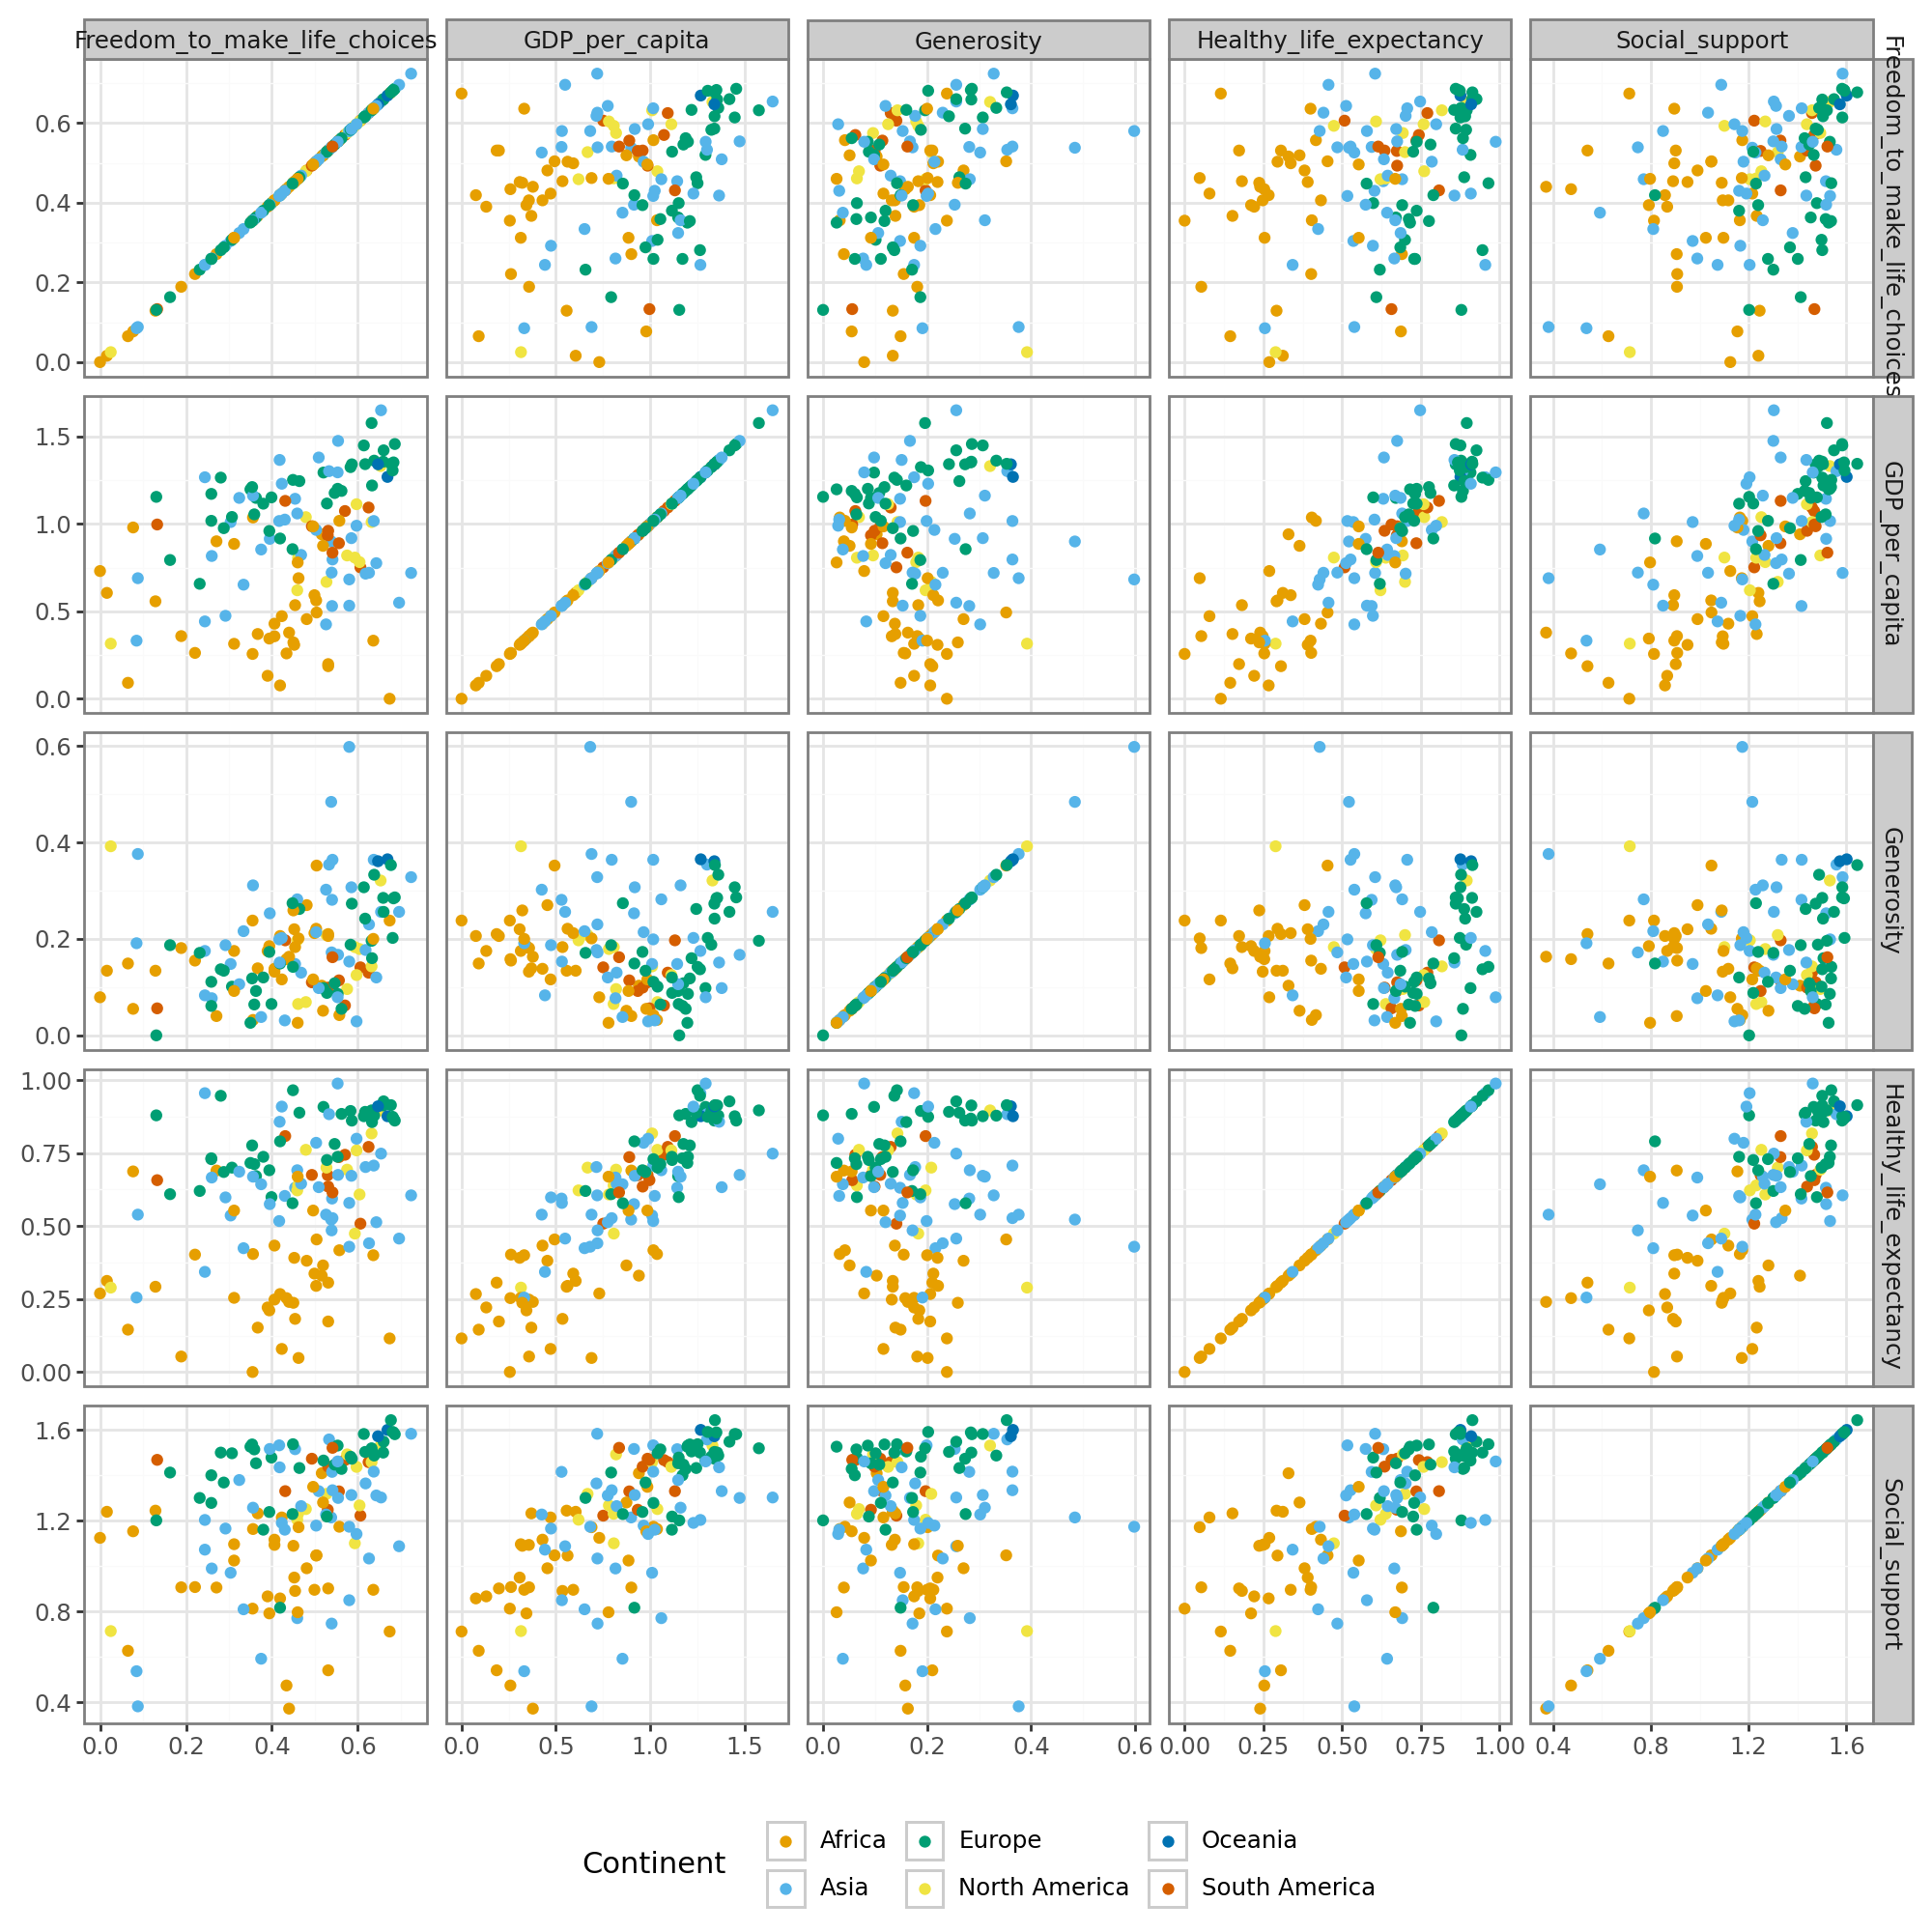

In [20]:
# Insert code here visual 1
# Reread the data
data = pd.read_csv('World_2018-1.csv')

# Select variables for plotting
plot_variables = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                  'Freedom_to_make_life_choices', 'Generosity']
selected_data = data[['name', 'continent'] + plot_variables]

# Reshape the data for pairwise combinations
melted_data_x = selected_data.melt(
    id_vars=['name', 'continent'], 
    value_vars=plot_variables, 
    value_name='value_x', 
    var_name='variable_x'
)

# Merge to pair every variable with every other variable
pairwise_data = melted_data_x.merge(selected_data)

# Create a new melted dataset for the second variable (y-axis)
plot_data = pairwise_data.melt(
    id_vars=["name", "continent", "variable_x", "value_x"], 
    value_vars=plot_variables, 
    value_name="value_y", 
    var_name="variable_y"
)

# Create the plot
plot = (
    ggplot(plot_data, aes("value_x", "value_y", color="continent"))
    + geom_point()
    + scale_color_manual(values=cbPalette, name="Continent")  # Adjust continent colors
    + facet_grid("variable_y ~ variable_x", scales="free")  # Create grid for all variable pairs
    + labs(x="", y="")  # Remove axis labels
    + theme_bw()  # Use a clean black-and-white theme
    + theme(legend_position="bottom", figure_size=(10, 10))  # Position legend and adjust figure size
)

# Display the plot
plot
# Remember to print the visual 

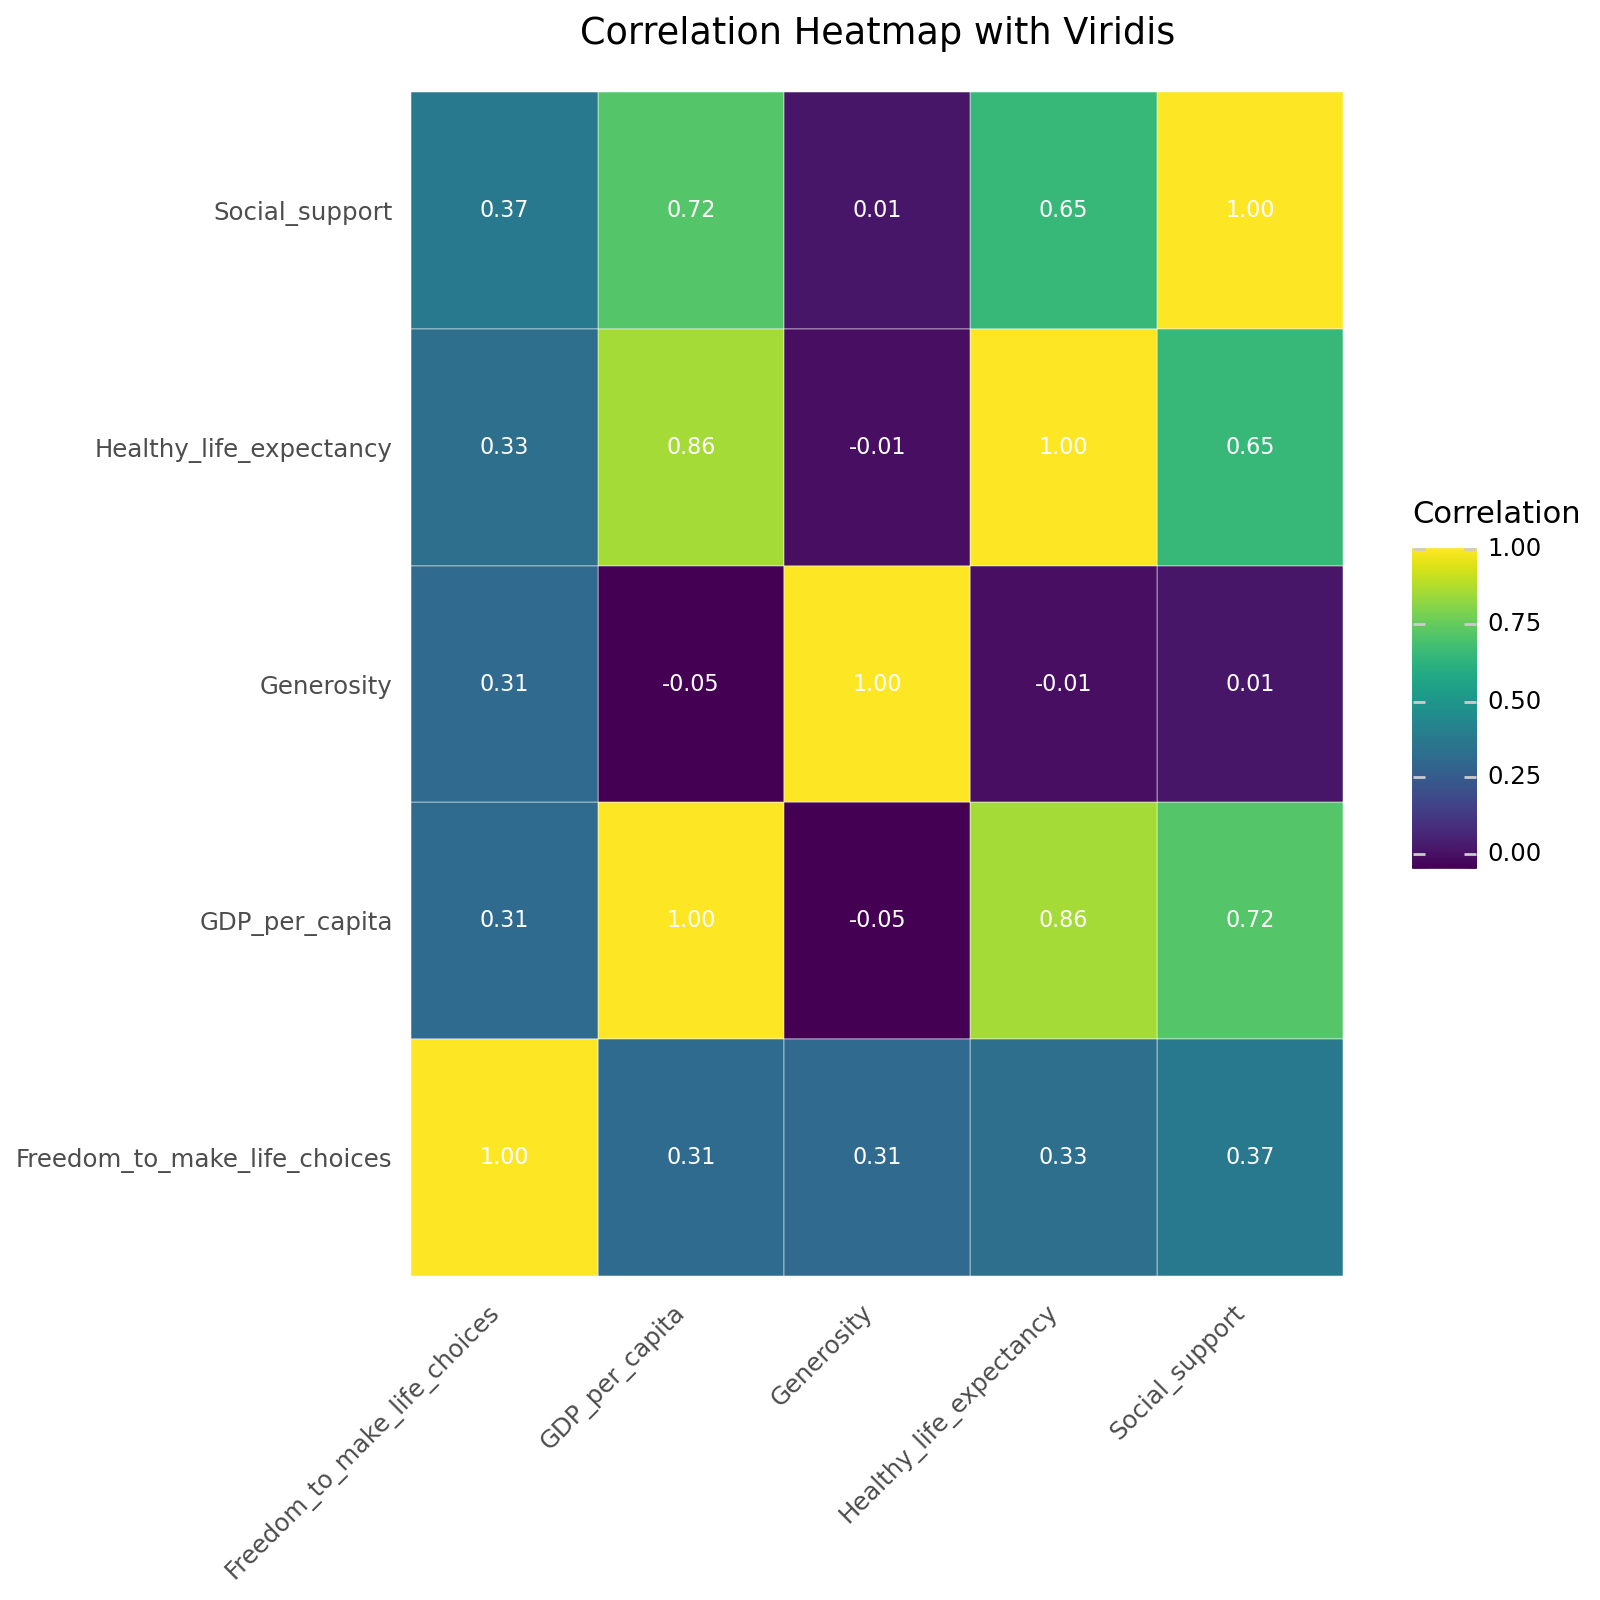

In [21]:
# Insert code here visual 2
# Load the data
data = pd.read_csv('World_2018-1.csv')

# Select relevant variables
plot_variables = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                  'Freedom_to_make_life_choices', 'Generosity']
selected_data = data[plot_variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Reshape the correlation matrix into a long format for ggplot
correlation_long = correlation_matrix.reset_index().melt(id_vars='index')
correlation_long.columns = ['Variable_X', 'Variable_Y', 'Correlation']

# Create the heatmap using ggplot
heatmap_plot = (
    ggplot(correlation_long, aes(x='Variable_X', y='Variable_Y', fill='Correlation'))
    + geom_tile(color='white')  # Use tiles to represent each correlation value
    + scale_fill_cmap(cmap_name='viridis', name='Correlation')  # Change to viridis colormap
    + geom_text(aes(label='Correlation.map("{:.2f}".format)'), size=8, color='white')  # Add text annotations
    + theme_minimal()  # Minimal theme for better clarity
    + labs(title='Correlation Heatmap with Viridis', x='', y='')
    + theme(
        axis_text_x=element_text(angle=45, hjust=1),
        figure_size=(8, 8),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank()
    )
)

# Display the heatmap
heatmap_plot

# Remember to print the visual 

*Brief motivation*

_Scatter Plot_

_The scatter plot grid visually showcases the specific distribution and trends between variables._

_Heatmap_

_The heatmap represents the strength of relationships using color, it's easy to identify the significant patterns across all variable pairs._

### Question 5.3

Has the amount of $\mathrm{CO}_2$ released per person increased from 1970 to 2018 for a majority of countries, and if yes what magnitude of increase are we talking about? Use the $\mathrm{CO}_2$ on Canvas and create a visual which answers these questions.

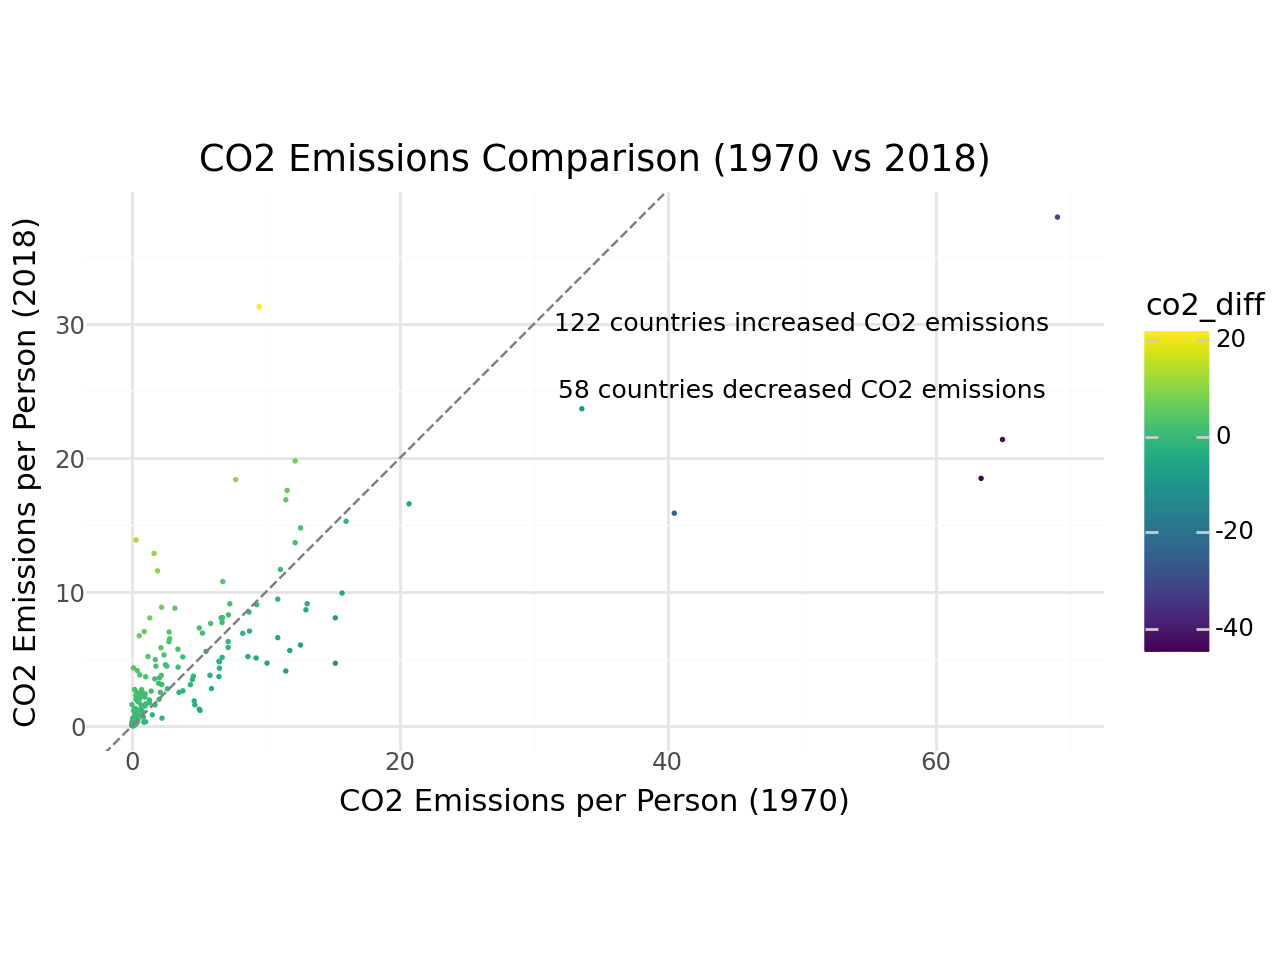

In [22]:
# Insert code here
# Load the CO2 data
co2_data = pd.read_csv("CO2_data.csv")

# Calculate the difference in CO2 emissions between 2018 and 1970
co2_data["co2_diff"] = co2_data["CO2_2018"] - co2_data["CO2_1970"]

# Calculate the number of countries with CO2 emissions increase and decrease
num_increase = co2_data[co2_data["co2_diff"] > 0].shape[0]  # Countries with increase in CO2 emissions
num_decrease = co2_data[co2_data["co2_diff"] < 0].shape[0]  # Countries with decrease in CO2 emissions

# Create a scatter plot to compare CO2 emissions in 1970 and 2018
scatter_plot = (
    ggplot(co2_data, aes(x='CO2_1970', y='CO2_2018', color='co2_diff'))
    + geom_point(size=0.1)
    + labs(x='CO2 Emissions per Person (1970)', y='CO2 Emissions per Person (2018)', title='CO2 Emissions Comparison (1970 vs 2018)')
    + geom_abline(slope=1, intercept=0, color="gray", linetype="dashed")  # Add 45° line (y = x)
    + coord_fixed(ratio=1)  # Ensure equal scaling on both axes
    + theme_minimal()
    + annotate("text", x=50, y=30, size=9, label=f"{num_increase} countries increased CO2 emissions", color='black')
    + annotate("text", x=50, y=25, size=9, label=f"{num_decrease} countries decreased CO2 emissions", color='black')
)

# Display the scatter plot
scatter_plot
# Remember to print the visual 